# Data Preparation

## Construct all_groups

In [5]:
import pandas as pd

#Read in the two files
arn_rf_groups = pd.read_csv("../data/rf_output_TSCA2b.csv").set_index("Unnamed: 0")
epa_groups = pd.read_csv("../outputs/TSCA_categories.csv").set_index("Unnamed: 0")

In [6]:
# Align column names
epa_groups = epa_groups.rename(columns={'chemicals':'dtxsid'})

In [7]:
# Remove unecessary columns
all_groups = arn_rf_groups.merge(epa_groups, on = 'dtxsid', how = 'inner')
all_groups = all_groups.drop(columns=['PREFERRED_NAME', 
 'errors', 
 'qsar_ready_smiles', 
 'physical_form',  
 'final_centroid',
 'final_dist',
 'lt65_picks',
 'gt65_picks',
 'MaxMin_selection_picks',
 'diverse_picks',
 'category_size',
 'final_picks',
 'screenable',
 'screenable_centroid',
 'screenable_centroid_id',
 'screening_analogues',
 'screening_dist',
 'tested.count',
 'phospho.substruct',
 'silico.substruct',
 'elements',
 'elements_permitted',
 'silicon_containing',
 'MolWeight',
 'nbLipinskiFailures',
 'LogP_pred',
 'LogP_predRange',
 'AD_LogP',
 'AD_index_LogP',
 'Conf_index_LogP',
 'MP_pred',
 'MP_predRange',
 'AD_MP',
 'AD_index_MP',
 'Conf_index_MP',
 'BP_pred',
 'BP_predRange',
 'AD_BP',
 'AD_index_BP',
 'Conf_index_BP',
 'LogVP_pred',
 'VP_predRange',
 'AD_VP',
 'AD_index_VP',
 'Conf_index_VP',
 'LogWS_pred',
 'WS_predRange',
 'AD_WS',
 'AD_index_WS',
 'Conf_index_WS',
 'LogHL_pred',
 'HL_predRange',
 'AD_HL',
 'AD_index_HL',
 'Conf_index_HL',
 'RT_pred',
 'AD_RT',
 'AD_index_RT',
 'Conf_index_RT',
 'RT_predRange',
 'LogKOA_pred',
 'KOA_predRange',
 'AD_KOA',
 'AD_index_KOA',
 'Conf_index_KOA',
 'ionization',
 'pKa_a_pred',
 'pKa_a_predRange',
 'pKa_b_pred',
 'pKa_b_predRange',
 'AD_pKa',
 'AD_index_pKa',
 'Conf_index_pKa',
 'LogD55_pred',
 'LogD55_predRange',
 'LogD74_pred',
 'LogD74_predRange',
 'AD_LogD',
 'AD_index_LogD',
 'Conf_index_LogD',
 'HLC',
 'WS_pred_mol/L',
 'WS_pred_mg/L',
 'vendor_count',
 'in_sigma_aldrich',
 'mol'])
all_groups.head()

dtxsid      CASRN            smiles                    NCC  \
0   DTXSID4063036  3452-09-3        CCCCCCCC#C  ('Neutral Organics',)   
1  DTXSID30870753   693-02-7           CCCCC#C  ('Neutral Organics',)   
2   DTXSID7062374  2396-65-8       C#CCCCCCC#C  ('Neutral Organics',)   
3   DTXSID9061097   765-13-9  CCCCCCCCCCCCCC#C  ('Neutral Organics',)   
4   DTXSID1061233   871-84-1        C#CCCCCC#C  ('Neutral Organics',)   

   ClassyFire                group   predicted group 1  \
0  Acetylides  ('Acetylides', nan)  Aliphatic nitriles   
1  Acetylides  ('Acetylides', nan)  Aliphatic nitriles   
2  Acetylides  ('Acetylides', nan)  Aliphatic nitriles   
3  Acetylides  ('Acetylides', nan)  Aliphatic nitriles   
4  Acetylides  ('Acetylides', nan)  Aliphatic nitriles   

                            predicted group 2  \
0  Organic phosphonic acids, salts and esters   
1                    Simple Lithium compounds   
2  primary aliphatic diamines and their salts   
3  Organic phosphonic acids, salts and esters   
4                    Simple Lithium compounds   

                            predicted group 3  predicted group 1 probability  \
0                    Simple Lithium compounds                       0.429444   
1  Organic phosphonic acids, salts and esters                       0.356111   
2                    Simple Lithium compounds                       0.403889   
3                    Simple Lithium compounds                       0.429444   
4  primary aliphatic diamines and their salts                       0.400556   

   ...  Imides (Chronic toxicity)  Organotins (Chronic toxicity)  \
0  ...                          0                              0   
1  ...                          0                              0   
2  ...                          0                              0   
3  ...                          0                              0   
4  ...                          0                              0   

   Phenols (Chronic toxicity)  Phosphinate Esters (Chronic toxicity)  \
0                           0                                      0   
1                           0                                      0   
2                           0                                      0   
3                           0                                      0   
4                           0                                      0   

   Polynitroaromatics (Chronic toxicity)  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Substituted Triazines (Chronic toxicity)  Thiols (Chronic toxicity)  \
0                                         0                          0   
1                                         0                          0   
2                                         0                          0   
3                                         0                          0   
4                                         0                          0   

   Vinyl Esters (Chronic toxicity)  Diazoniums (Chronic toxicity)  \
0                                0                              0   
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   

   Ethylene Glycol Ethers  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  

[5 rows x 78 columns]

In [8]:
all_groups['epa_list'] = ''
for i,x in all_groups.iterrows():
    epa_slice = x[-65:]
    cats = epa_slice.keys()
    epa_list = []
    for key in cats:
        if all_groups.loc[i,key] == True:
            epa_list.append(key)
    all_groups.loc[i,'epa_list'] = str(epa_list)

In [207]:
counter = 0
for word_list in all_groups['epa_list']:
    if len(word_list.split(','))>1:
        counter += 1
counter

2440

## Initial Coverage Analysis

In [208]:
ncc_list = all_groups['NCC']
new_ncc_list = []
for i in ncc_list:
    if type(i) == float:
        new_ncc_list.append("[]")
    else:
        words = i.split(',')
        first_word = words[0][2:-1]
        new_list = [first_word]
        if len(words) > 2:
            last_word = words[-1][1:-3]
            if len(words) > 3:
                for k in words[1:-1]:
                    new_list.append(k[1:-1])
        new_ncc_list.append(str(new_list))
new_ncc_list[10:20]


["['Neutral Organics']",
 "['Neutral Organics']",
 "['Neutral Organics']",
 '[]',
 "['Neutral Organics']",
 "['Neutral Organics']",
 "['Neutral Organics']",
 "['Neutral Organics']",
 "['Neutral Organics']",
 "['Neutral Organics']"]

In [209]:
#Take a quick look at how the new NCC code has changed predictions over time
all_groups['NCC_EPA_match'] = [all_groups['epa_list'][i] == new_ncc_list[i] for i in range(len(all_groups))]

In [210]:
#This is the number of chemicals with new categories since updating the EPA NCC code and fixing categories
len(all_groups) - all_groups['NCC_EPA_match'].sum()

np.int64(3061)

In [211]:
# These are the changed chemicals. Note that many already were in categories but now have additional categories.
all_groups.loc[all_groups['NCC_EPA_match'] == False]

dtxsid       CASRN  \
59      DTXSID1062621   2744-50-5   
86      DTXSID6066579  20241-77-4   
114     DTXSID2025210  17418-58-5   
115    DTXSID40888142  72363-26-9   
116     DTXSID7068926  54243-60-6   
...               ...         ...   
14170   DTXSID0027981  33509-43-2   
14172   DTXSID4026262   2451-62-9   
14174   DTXSID2060042    461-89-2   
14177  DTXSID90885363  26603-40-7   
14178  DTXSID90888692  88379-83-3   

                                                  smiles  \
59     CC(C)COC(=O)C1=CC=C2C3=CC=CC4=C(C=CC(C5=CC=CC1...   
86     NC1=C2C(=O)C3=C(C(O)=CC=C3NC3=CC=CC=C3)C(=O)C2...   
114    NC1=C2C(=O)C3=C(C=CC=C3)C(=O)C2=C(O)C=C1OC1=CC...   
115    CCOCCCNS(=O)(=O)C1=CC=C(OC2=C(N)C3=C(C(O)=C2)C...   
116    COC1=CC=C(OC2=CC(O)=C3C(=O)C4=C(C=CC=C4)C(=O)C...   
...                                                  ...   
14170                         CC(C)(C)C1=NNC(=S)N(N)C1=O   
14172           O=C1N(CC2CO2)C(=O)N(CC2CO2)C(=O)N1CC1CO1   
14174                                    O=C1NN=CC(=O)N1   
14177  O=C=NCC1=CC(=CC=C1)N1C(=O)N(C2=CC=CC(CN=C=O)=C...   
14178            OCCN1C(=O)N(CCO)C(=O)N(CCOC(=O)C=C)C1=O   

                                                     NCC   ClassyFire  \
59                        ('Esters (Chronic toxicity)',)  Anthracenes   
86     ('Anilines (Acute toxicity)', 'Phenols (Acute ...  Anthracenes   
114    ('Anilines (Acute toxicity)', 'Phenols (Acute ...  Anthracenes   
115    ('Anilines (Acute toxicity)', 'Phenols (Acute ...  Anthracenes   
116    ('Anilines (Acute toxicity)', 'Phenols (Acute ...  Anthracenes   
...                                                  ...          ...   
14170                                                NaN    Triazines   
14172  ('Epoxides', 'Substituted Triazines (Acute tox...    Triazines   
14174                                                NaN    Triazines   
14177  ('Diisocyanates', 'Substituted Triazines (Acut...    Triazines   
14178  ('Acrylates/Methacrylates (Acute toxicity)', '...    Triazines   

                      group  \
59     ('Anthracenes', 1.0)   
86     ('Anthracenes', 3.0)   
114    ('Anthracenes', 5.0)   
115    ('Anthracenes', 5.0)   
116    ('Anthracenes', 5.0)   
...                     ...   
14170    ('Triazines', nan)   
14172    ('Triazines', nan)   
14174    ('Triazines', nan)   
14177    ('Triazines', nan)   
14178    ('Triazines', nan)   

                                       predicted group 1  \
59                                      Ortho-phthalates   
86                               miscellaneous chemistry   
114                              miscellaneous chemistry   
115                              miscellaneous chemistry   
116                              miscellaneous chemistry   
...                                                  ...   
14170                     Dihydropurinedione derivatives   
14172                         Glycidyl ethers and esters   
14174                            miscellaneous chemistry   
14177  Unsubstituted and linear aliphatic-substituted...   
14178                   acrylate and methacrylate amines   

                                       predicted group 2  \
59       Isophthalates, Terephthalates and Trimellitates   
86                                         aralkylamines   
114                                        aralkylamines   
115                                        aralkylamines   
116                                      aromatic ethers   
...                                                  ...   
14170                            miscellaneous chemistry   
14172  Phthalic anhydrides and hydrogenated phthalic ...   
14174  Unsubstituted and linear aliphatic-substituted...   
14177                                  Aromatic nitriles   
14178                            miscellaneous chemistry   

                                       predicted group 3  \
59                                             Benzoates   
86     Unsubstituted and linear aliph

In [212]:
# Counting the chemicals sorted by neither method
no_domain_no_ncc = []
for i in range(len(all_groups)):
    x = False
    y = False
    if all_groups['in domain'][i] == False:
        x = True
    if all_groups['epa_list'][i] == '[]':
        y = True
    if x and y:
        no_domain_no_ncc.append(i)
all_groups.loc[no_domain_no_ncc].head()

dtxsid      CASRN  \
13  DTXSID30862951  2450-71-7   
22   DTXSID5021883   107-19-7   
27   DTXSID1062752  2978-58-7   
33  DTXSID60883396   485-71-2   
35   DTXSID6045082   118-10-5   

                                               smiles  NCC  \
13                                              NCC#C  NaN   
22                                              OCC#C  NaN   
27                                        CC(C)(N)C#C  NaN   
33  [H][C@]1(C[C@@H]2CC[N@]1C[C@@H]2C=C)[C@H](O)C1...  NaN   
35  [H][C@@]1(C[C@@H]2CC[N@]1C[C@@H]2C=C)[C@@H](O)...  NaN   

                   ClassyFire                               group  \
13                 Acetylides                 ('Acetylides', nan)   
22                 Acetylides                 ('Acetylides', nan)   
27                 Acetylides                 ('Acetylides', nan)   
33  Alkaloids and derivatives  ('Alkaloids and derivatives', nan)   
35  Alkaloids and derivatives  ('Alkaloids and derivatives', nan)   

                             predicted group 1  \
13  primary aliphatic diamines and their salts   
22        1,2-ethanediols and their carbonates   
27                          Aliphatic nitriles   
33                     miscellaneous chemistry   
35                     miscellaneous chemistry   

                      predicted group 2  \
13                   Aliphatic nitriles   
22                   Aliphatic nitriles   
27  Molybdenum and its simple compounds   
33                           imidazoles   
35                           imidazoles   

                                    predicted group 3  \
13                Molybdenum and its simple compounds   
22  Brominated cycloalkanes, alcohols, phosphates,...   
27                                      Polyol amines   
33                              hydrocarbyl siloxanes   
35                              hydrocarbyl siloxanes   

    predicted group 1 probability  ...  Phenols (Chronic toxicity)  \
13                       0.450333  ...                           0   
22                       0.217000  ...                           0   
27                       0.192222  ...                           0   
33                       0.185667  ...                           0   
35                       0.185667  ...                           0   

    Phosphinate Esters (Chronic toxicity)  \
13                                      0   
22                                      0   
27                                      0   
33                                      0   
35                                      0   

    Polynitroaromatics (Chronic toxicity)  \
13                                      0   
22                                      0   
27                                      0   
33                                      0   
35                                      0   

    Substituted Triazines (Chronic toxicity)  Thiols (Chronic toxicity)  \
13                                         0                          0   
22                                         0                          0   
27                                         0                          0   
33                                         0                          0   
35                                         0                          0   

    Vinyl Esters (Chronic toxicity)  Diazoniums (Chronic toxicity)  \
13                                0                              0   
22                                0                              0   
27                                0                              0   
33                                0                              0   
35                                0                              0   

    Ethylene Glycol Ethers  epa_list  NCC_EPA_match  
13                       0        []           True  
22                       0        []           True  
27                       0        []           True  
33                       0        []           True  
35               

In [213]:
len(no_domain_no_ncc)

2642

In [214]:
# How many chemicals are sorted by NCC?  ARN?
len(all_groups.loc[all_groups['epa_list']!='[]']), len(all_groups.loc[all_groups['in domain']==True])

(7770, 9435)

In [215]:
# Counting ARN but not NCC
in_domain_only = all_groups.loc[all_groups['in domain']==True]

In [216]:
len(in_domain_only.loc[in_domain_only['epa_list']=='[]'])

3806

In [217]:
# Counting ARN miscellaneous
len(in_domain_only.loc[all_groups['predicted group 1']=='miscellaneous chemistry'])

1339

In [218]:
# Of ARN miscellaneous, how many are also not categorized by NCC?
len(in_domain_only.loc[all_groups['predicted group 1']=='miscellaneous chemistry'].loc[all_groups['epa_list']=='[]'])

642

In [219]:
# A quick look at chemicals categorized by NCC but sorted to miscellaneous by ARN
misc_plus_ncc = in_domain_only.loc[all_groups['predicted group 1']=='miscellaneous chemistry'].loc[all_groups['epa_list'] !='[]']
print(len(misc_plus_ncc))
misc_plus_ncc[['epa_list', 'predicted group 1']].groupby('epa_list').count()

697


predicted group 1
epa_list                                                             
['Acrylamides', 'Cationic (quaternary ammonium)...                  1
['Acrylamides']                                                     5
['Acrylates/Methacrylates (Acute toxicity)', 'B...                  1
['Acrylates/Methacrylates (Acute toxicity)', 'E...                  1
['Acrylates/Methacrylates (Acute toxicity)', 'E...                  9
...                                                               ...
['Polynitroaromatics (Acute toxicity)']                             1
['Substituted Triazines (Acute toxicity)']                          3
['Substituted Triazines (Chronic toxicity)']                        1
['Thiols (Acute toxicity)']                                         2
['Vinyl Sulfones']                                                  4

[71 rows x 1 columns]

In [220]:
sum(['Anilines (Acute toxicity)' in all_groups['epa_list'][i] for i in range(len(all_groups))])

535

In [221]:
# Count the chemicals categorized by NCC but not at all by ARN (out of the doimain of applicability)
out_of_domain = all_groups.loc[all_groups['in domain']==False]
in_domain = all_groups.loc[all_groups['in domain']==True]
len(out_of_domain.loc[out_of_domain['epa_list']!= '[]'])

2141

# Understanding Group Gaps

## ARN Gaps

In [222]:
epa_categories = ['Acid Chlorides', 'Acrylamides', 'Acrylates/Methacrylates (Acute toxicity)',
       'Aldehydes (Acute toxicity)', 'Aliphatic Amines', 'Aluminum Compounds',
       'Anilines (Acute toxicity)', 'Azides (Acute toxicity)',
       'Benzotriazoles (Acute toxicity)', 'Benzotriazole-hindered phenols',
       'Boron Compounds', 'Cationic (quaternary ammonium) surfactants',
       'Cobalt', 'Diazoniums (Acute toxicity)', 'Epoxides',
       'Esters (Acute toxicity)', 'Hydrazines and Related Compounds',
       'Hindered Amines', 'Imides (Acute toxicity)',
       'Lanthanides or Rare Earth Metals', 'Neutral Organics',
       'Nickel Compounds', 'Nonionic Surfactants',
       'Organotins (Acute toxicity)', 'Peroxides', 'Phenolphthaleins',
       'Phenols (Acute toxicity)', 'Phosphates, Inorganic',
       'Phosphinate Esters (Acute toxicity)',
       'Stilbene, derivatives of 4,4-bis(triazin-2-ylamino)-',
       'Thiols (Acute toxicity)', 'Substituted Triazines (Acute toxicity)',
       'Triarylmethane Pigments/Dyes with Non-solubilizing Groups',
       'Vinyl Esters (Acute toxicity)', 'Vinyl Sulfones',
       'Soluble complexes of Zinc', 'Anhydrides, Carboxylic acid',
       'Dichlorobenzidine-based Pigments', 'Diisocyanates', 'Alkoxysilanes',
       'Dianilines', 'Anionic Surfactants',
       'Dithiocarbamates (Acute toxicity)', 'beta-Naphthylamines, Sulfonated',
       'Polynitroaromatics (Acute toxicity)', 'Rosin', 'Zirconium Compounds',
       'Aminobenzothiazole Azo Dyes',
       'Acrylates/Methacrylates (Chronic toxicity)',
       'Aldehydes (Chronic toxicity)', 'Anilines (Chronic toxicity)',
       'Azides (Chronic toxicity)', 'Benzotriazoles (Chronic toxicity)',
       'Dithiocarbamates (Chronic toxicity)', 'Esters (Chronic toxicity)',
       'Imides (Chronic toxicity)', 'Organotins (Chronic toxicity)',
       'Phenols (Chronic toxicity)', 'Phosphinate Esters (Chronic toxicity)',
       'Polynitroaromatics (Chronic toxicity)',
       'Substituted Triazines (Chronic toxicity)', 'Thiols (Chronic toxicity)',
       'Vinyl Esters (Chronic toxicity)', 'Diazoniums (Chronic toxicity)',
       'Ethylene Glycol Ethers']

In [223]:
# The NCC category layout of those chemicals not covered by ARN categories
pd.set_option("display.max_rows", 66)
out_of_domain.loc[:,epa_categories].sum().sort_values(ascending=False)

Neutral Organics                                             1027
Anilines (Acute toxicity)                                     233
Esters (Acute toxicity)                                       163
Phenols (Acute toxicity)                                      150
Aldehydes (Acute toxicity)                                    115
Alkoxysilanes                                                  99
Lanthanides or Rare Earth Metals                               77
Imides (Acute toxicity)                                        74
Polynitroaromatics (Acute toxicity)                            72
Thiols (Acute toxicity)                                        54
Substituted Triazines (Acute toxicity)                         47
Boron Compounds                                                47
Epoxides                                                       42
Hydrazines and Related Compounds                               31
Anionic Surfactants                                            25
Acid Chlor

In [224]:
# The number of members of those groups that ARE sorted by ARN - those that are not
(in_domain.loc[:,epa_categories].sum()-out_of_domain.loc[:,epa_categories].sum()).sort_values(ascending=False)

Neutral Organics                                             2579
Esters (Acute toxicity)                                      1424
Phenols (Acute toxicity)                                      390
Esters (Chronic toxicity)                                     323
Acrylates/Methacrylates (Acute toxicity)                      233
Anionic Surfactants                                           212
Aldehydes (Acute toxicity)                                    189
Acid Chlorides                                                 94
Anhydrides, Carboxylic acid                                    80
Epoxides                                                       69
Anilines (Acute toxicity)                                      69
Peroxides                                                      64
Acrylates/Methacrylates (Chronic toxicity)                     42
Ethylene Glycol Ethers                                         39
Alkoxysilanes                                                  37
Thiols (Ac

In [225]:
#Look at NCC categories for which ARN never classifies
NCC_only_categories = {}
for category in epa_categories:
    in_domains = sum(all_groups.loc[all_groups['in domain'] == True][category])
    out_domains = sum(all_groups.loc[all_groups['in domain'] == False][category])
    if in_domains == 0:
        if out_domains > 0:
            NCC_only_categories[category] = out_domains
import pprint
pprint.pprint(NCC_only_categories)

{'Azides (Acute toxicity)': 4,
 'Boron Compounds': 47,
 'Cobalt': 1,
 'Lanthanides or Rare Earth Metals': 77,
 'Rosin': 2}


## NCC Gaps

In [226]:
arn_categories = all_groups['predicted group 1'].unique()

In [227]:
#Look at ARN categories for which NCC never classifies
ARN_only_categories = {}
for category in arn_categories:
    category_members = all_groups.loc[all_groups['predicted group 1'] == category]
    in_cats = len(category_members.loc[category_members['epa_list'] != '[]'])
    out_cats = len(category_members.loc[category_members['epa_list'] == '[]'])
    if in_cats == 0:
        if out_cats > 0:
            ARN_only_categories[category] = out_cats
import pprint
pprint.pprint(ARN_only_categories)

{'Alkyl aryl and cyclic diaryl esters of phosphoric acid': 10,
 'Mono-, di-phenyl phosphite derivatives': 15,
 'tetrahydroxymethyl and tetraalkyl phosphonium salts': 1}


In [228]:
# A look at how populated the ARN categories are for this data set:
for category in arn_categories:
    category_members = all_groups.loc[all_groups['predicted group 1'] == category]
    print(f"{category}: {len(category_members)}")

Aliphatic nitriles: 441
Zirconium and its simple inorganic compounds: 373
primary aliphatic diamines and their salts: 314
1,2-ethanediols and their carbonates: 339
Brominated cycloalkanes, alcohols, phosphates, triazine triones, diphenyl ethers and diphenyl alkyls (flame retardants related substances): 259
miscellaneous chemistry: 2451
Benzoates: 284
aromatic ethers: 213
Phthalic anhydrides and hydrogenated phthalic anhydrides: 147
Unsubstituted and linear aliphatic-substituted cyclic ketones: 748
Aromatic nitriles: 177
chlorinated aromatic hydrocarbons: 868
Ethoxylated < C6 alcohols (other than methanol and ethanol); ethoxylated aromatic alcohols: 183
Ortho-phthalates: 258
thioxanthenones: 37
aralkylamines: 450
Ditriazine stilbenedisulfonic acid dyes (optical brighteners): 8
Polycarboxylic acid monoamines, hydroxy derivatives and their salts with monovalent cations: 36
Vinylbenzene derivatives: 41
nitroalkanes: 173
Miscellaneous bisphenols: 18
Alpha-chloro aliphatic carboxylate deriva

## Subcategories from Different Sets

In [229]:
# Check for NCC Categories which may be contained inside ARN categories
for category in epa_categories:
    category_members = all_groups.loc[all_groups[category]==1]
    outer_groups = category_members['predicted group 1'].unique()
    if len(outer_groups) == 1:
        print(f"{category} is a subcategory of {outer_groups} with {len(category_members)} members.")

Cobalt is a subcategory of ['miscellaneous chemistry'] with 1 members.
Triarylmethane Pigments/Dyes with Non-solubilizing Groups is a subcategory of ['Paraben acid, salts and esters'] with 1 members.
Azides (Chronic toxicity) is a subcategory of ['Bisphenol A (BPA) derivatives'] with 1 members.
Dithiocarbamates (Chronic toxicity) is a subcategory of ['Thioureas'] with 2 members.
Vinyl Esters (Chronic toxicity) is a subcategory of ['Esters from linear saturated dicarboxylic acids and branched aliphatic alcohols'] with 2 members.


In [230]:
# Check for ARN Categories which may be contained inside NCC categories
for category in arn_categories:
    category_members = all_groups.loc[all_groups['predicted group 1']==category]
    outer_groups = []
    for category2 in epa_categories:
        if sum(category_members[category2]) > 0:
            outer_groups.append(category2)
    if len(outer_groups) == 1:
        print(f"{category} is a subcategory of {outer_groups} with {len(category_members)} members.")

thioxanthenones is a subcategory of ['Anhydrides, Carboxylic acid'] with 37 members.
Simple manganese compounds is a subcategory of ['Phosphates, Inorganic'] with 16 members.
Dialkyl (and diaryl) dithiophosphates (DDP) is a subcategory of ['Soluble complexes of Zinc'] with 20 members.


In [231]:
#Checks for common category titles

#Are any NCC titles in the ARN titles?
for category1 in epa_categories:
    category1 = category1.lower()
    for category2 in arn_categories:
        category2 = category2.lower()
        if category1 in category2:
            print(category1)

#Check again, but without the acute and chronic tags, which likely won't appear in ARN titles
for category1 in epa_categories:
    category1 = category1.lower()
    if 'acute toxicity' in category1:
        category1 = category1[:-16]
    elif 'chronic toxicity' in category1:
        category1 = category1[:-18]
    for category2 in arn_categories:
        category2 = category2.lower()
        if category1 in category2:
            print(category1, category2)

#Are any ARN titles in the NCC titles?
for category1 in arn_categories:
    category1 = category1.lower()
    for category2 in epa_categories:
        category2 = category2.lower()
        if category1 in category2:
            print(category1)



esters  esters from branched or non-aromatic cyclic dicarboxylic acids and aliphatic alcohols
esters  esters from linear saturated dicarboxylic acids and branched aliphatic alcohols
esters  alkyl aryl and cyclic diaryl esters of phosphoric acid
esters  esters from branched or non-aromatic cyclic dicarboxylic acids and aliphatic alcohols
esters  esters from linear saturated dicarboxylic acids and branched aliphatic alcohols
esters  alkyl aryl and cyclic diaryl esters of phosphoric acid


In [232]:
ungrouped_chems = all_groups.iloc[no_domain_no_ncc]
classyfires = ungrouped_chems['ClassyFire'].unique()
ungrouped_chems.groupby('ClassyFire').count()['dtxsid'].sort_values(ascending=False)

ClassyFire
Mixed metal/non-metal compounds             325
Benzene and substituted derivatives         228
Organometallic compounds                    203
Organoheterocyclic compounds                195
Organohalogen compounds                     120
Organooxygen compounds                       99
Organic nitrogen compounds                   99
Naphthalenes                                 89
Prenol lipids                                88
Carboxylic acids and derivatives             82
Homogeneous non-metal compounds              78
Diazines                                     73
Azoles                                       68
Organosulfur compounds                       62
Pyridines and derivatives                    59
Anthracenes                                  54
Other                                        50
Organic salts                                47
Azobenzenes                                  46
Phenylpropanoids and polyketides             45
Homogeneous metal compounds  

In [233]:
classyfire_dict = {'group':[], 'percent ungrouped':[], 'total':[]}
for group in classyfires:
    ungrouped_members = len(ungrouped_chems.loc[ungrouped_chems['ClassyFire']==group])
    total_members = len(all_groups.loc[all_groups['ClassyFire']==group])
    percent = 100*ungrouped_members/total_members
    classyfire_dict['group'].append(group)
    classyfire_dict['percent ungrouped'].append(round(percent,2))
    classyfire_dict['total'].append(total_members)
pd.DataFrame(classyfire_dict).set_index('group', drop = True).sort_values('percent ungrouped', ascending=False).head(20)

percent ungrouped  total
group                                                            
Inorganic salts                                     100.00      2
Miscellaneous inorganic compounds                   100.00      3
Nucleosides, nucleotides, and analogues              90.00     20
Organic salts                                        81.03     58
Mixed metal/non-metal compounds                      79.27    410
Diazines                                             76.04     96
Homogeneous non-metal compounds                      72.22    108
Homogeneous metal compounds                          69.35     62
Benzimidazoles                                       65.71     35
Alkaloids and derivatives                            63.64     11
Benzothiazoles                                       59.02     61
Indoles and derivatives                              52.38     63
Oxazinanes                                           48.65     37
Azoles                                               48.23    141
Steroids and steroid derivatives                     47.62     42
Benzopyrans                                          43.40     53
Indanes                                              42.86     35
Quinolines and derivatives                           42.42     99
Azolidines                                           41.67     72
Isoindoles and derivatives                           38.46     39

## Ungrouped Chemicals Analyzed by Morgan Print features

In [234]:
from rdkit.Chem import AllChem
from rdkit import Chem
import numpy as np

mp_fps = dict(zip(all_groups["dtxsid"],all_groups["smiles"]))
mp_fps = {k:Chem.MolFromSmiles(v) for k,v in mp_fps.items() if v}
mp_fps = {k:v for k,v in mp_fps.items() if v}
mp_fp_df = pd.DataFrame([np.array(AllChem.GetMorganFingerprintAsBitVect(i,3,2048)) for i in mp_fps.values()])
mp_fp_df.index = mp_fps.keys()
mp_fp_df.columns = ['mg_fp%d'%i for i in mp_fp_df.columns]

mp_fp_df.head()

[16:46:52] DEPRECATION WARNING: please use MorganGenerator
[16:46:52] DEPRECATION WARNING: please use MorganGenerator
[16:46:52] DEPRECATION WARNING: please use MorganGenerator
[16:46:52] DEPRECATION WARNING: please use MorganGenerator
[16:46:52] DEPRECATION WARNING: please use MorganGenerator
[16:46:52] DEPRECATION WARNING: please use MorganGenerator
[16:46:52] DEPRECATION WARNING: please use MorganGenerator
[16:46:52] DEPRECATION WARNING: please use MorganGenerator
[16:46:52] DEPRECATION WARNING: please use MorganGenerator
[16:46:52] DEPRECATION WARNING: please use MorganGenerator
[16:46:52] DEPRECATION WARNING: please use MorganGenerator
[16:46:52] DEPRECATION WARNING: please use MorganGenerator
[16:46:52] DEPRECATION WARNING: please use MorganGenerator
[16:46:52] DEPRECATION WARNING: please use MorganGenerator
[16:46:52] DEPRECATION WARNING: please use MorganGenerator
[16:46:52] DEPRECATION WARNING: please use MorganGenerator
[16:46:52] DEPRECATION WARNING: please use MorganGenerat

mg_fp0  mg_fp1  mg_fp2  mg_fp3  mg_fp4  mg_fp5  mg_fp6  \
DTXSID4063036        0       0       0       0       0       0       0   
DTXSID30870753       0       0       0       0       0       0       0   
DTXSID7062374        0       0       0       0       0       0       0   
DTXSID9061097        0       0       0       0       0       0       0   
DTXSID1061233        0       0       0       0       0       0       0   

                mg_fp7  mg_fp8  mg_fp9  ...  mg_fp2038  mg_fp2039  mg_fp2040  \
DTXSID4063036        0       0       0  ...          0          0          0   
DTXSID30870753       0       0       0  ...          0          0          0   
DTXSID7062374        0       0       0  ...          0          0          0   
DTXSID9061097        0       0       0  ...          0          0          0   
DTXSID1061233        0       0       0  ...          0          0          0   

                mg_fp2041  mg_fp2042  mg_fp2043  mg_fp2044  mg_fp2045  \
DTXSID4063036           0          0          0          0          0   
DTXSID30870753          0          0          0          0          0   
DTXSID7062374           0          0          0          0          0   
DTXSID9061097           0          0          0          0          0   
DTXSID1061233           0          0          0          0          0   

                mg_fp2046  mg_fp2047  
DTXSID4063036           0          0  
DTXSID30870753          1          0  
DTXSID7062374           0          0  
DTXSID9061097           0          0  
DTXSID1061233           0          0  

[5 rows x 2048 columns]

In [235]:
# Percentage of occurences of a feature that are seen in ungrouped chemicals
ungrouped_indices = ungrouped_chems['dtxsid']
ungrouped_prints = mp_fp_df.loc[ungrouped_indices]
(ungrouped_prints.sum()/mp_fp_df.sum()).sort_values(ascending=False)

mg_fp1188    0.697842
mg_fp506     0.668571
mg_fp224     0.657143
mg_fp1679    0.571429
mg_fp1306    0.567568
               ...   
mg_fp910     0.038889
mg_fp1004    0.037547
mg_fp156     0.034483
mg_fp147     0.034121
mg_fp145     0.026616
Length: 2048, dtype: float64

In [236]:
mp_fp_df.loc[:,['mg_fp1188', 'mg_fp224', 'mg_fp506', 'mg_fp1679', 'mg_fp1306']].sum()

mg_fp1188    139
mg_fp224      70
mg_fp506     175
mg_fp1679     70
mg_fp1306     37
dtype: int64

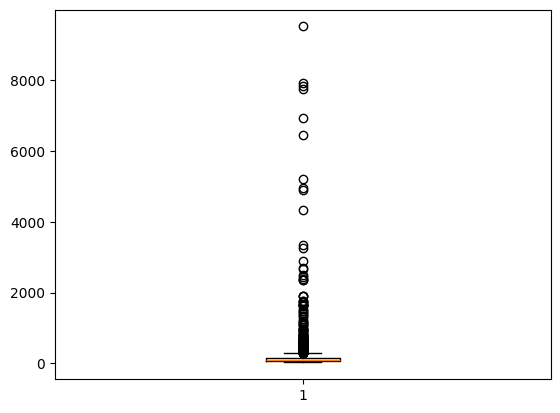

In [237]:
import matplotlib.pyplot as plt

#Some context for whether the above percentages are meaningful: On average, a given bit appears in 123 chemicals (mean)
# with a median of 60 chemicals. fp1188 appears in 119 chemicals total, with 79.8% of these being chemicals uncategorized 
# by either ARN or NCC

plt.boxplot(mp_fp_df.sum().values)
plt.show()

# Grouped Chemical Distributions

## Group summaries

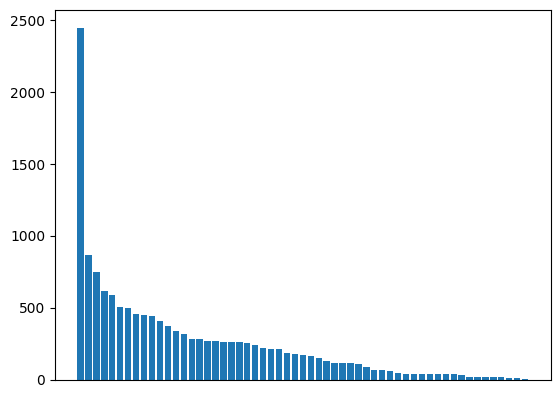

In [238]:
import matplotlib.pyplot as plt

#Bar chart of ARN category membership
series_of_interest = all_groups['predicted group 1'].value_counts()
plt.bar(series_of_interest.index, series_of_interest.values)
plt.xticks([])
index_str = ''
for i in series_of_interest.index:
    index_str += i
    index_str += '\n'
# plt.annotate(index_str, (57,1400))
plt.show()

In [239]:
pd.DataFrame(all_groups['predicted group 1'].value_counts())

count
predicted group 1                                        
miscellaneous chemistry                              2451
chlorinated aromatic hydrocarbons                     868
Unsubstituted and linear aliphatic-substituted ...    748
Simple Lithium compounds                              618
Esters from linear saturated dicarboxylic acids...    585
Alpha-chloro aliphatic carboxylate derivatives        504
Esters from branched or non-aromatic cyclic dic...    499
Cyclic ethers                                         454
aralkylamines                                         450
Aliphatic nitriles                                    441
hydrocarbyl siloxanes                                 405
Zirconium and its simple inorganic compounds          373
1,2-ethanediols and their carbonates                  339
primary aliphatic diamines and their salts            314
Benzoates                                             284
Branched carboxylic acids and its salts               279
Branched/cyclic dialiphatic ethers (excluding a...    266
Isophthalates, Terephthalates and Trimellitates       266
Linear and branched alpha-beta unsaturated ketones    261
Brominated cycloalkanes, alcohols, phosphates, ...    259
Ortho-phthalates                                      258
Organic phosphonic acids, salts and esters            251
Aralkylaldehydes                                      242
Linear aliphatic ketones                              219
aromatic ethers                                       213
acrylate and methacrylate amines                      213
Ethoxylated < C6 alcohols (other than methanol ...    183
Aromatic nitriles                                     177
nitroalkanes                                          173
simple vanadium compounds                             163
Phthalic anhydrides and hydrogenated phthalic a...    147
imidazoles                                            131
Molybdenum and its simple compounds                   117
Polyol amines                                         115
Aliphatic primary amides                              115
(tetrahydro)furan primary alcohol derivatives a...    107
Glycidyl ethers and esters                             90
Salicylic acid, its salts and alkylated derivat...     69
Bisphenol A (BPA) derivatives                          66
Thioureas                                              60
Caesium compounds                                      42
Vinylbenzene derivatives                               41
Paraben acid, salts and esters                         40
Dihydropurinedione derivatives                         39
thioxanthenones                                        37
Polycarboxylic acid monoamines, hydroxy derivat...     36
Salicylate esters                                      36
Cyclic acetals from aldehydes                          35
Acyl glycinates and sarcosinates                       32
Dialkyl (and diaryl) dithiophosphates (DDP)            20
Acyl derivatives from alpha-amino acids other t...     19
Miscellaneous bisphenols                               18
Simple manganese compounds                             16
Mono-, di-phenyl phosphite derivatives                 15
Alkyl aryl and cyclic diaryl esters of phosphor...     10
Ditriazine stilbenedisulfonic acid dyes (optica...      8
tetrahydroxymethyl and tetraalkyl phosphonium s...      1

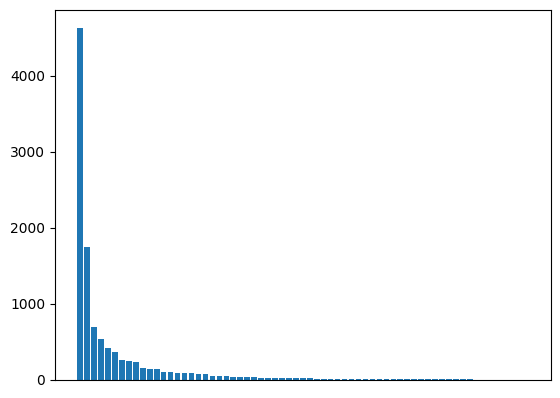

In [240]:
# Bar chart of NCC Category membership

ncc_df = pd.DataFrame({'category':epa_categories, 'count':[sum(all_groups[i]) for i in epa_categories]})
ncc_df = ncc_df.sort_values('count', ascending=False)
plt.bar(ncc_df['category'], ncc_df['count'])
plt.xticks([])
plt.show()

In [339]:
ncc_df

category  count
20                                   Neutral Organics   4633
15                            Esters (Acute toxicity)   1750
26                           Phenols (Acute toxicity)    690
6                           Anilines (Acute toxicity)    535
3                          Aldehydes (Acute toxicity)    419
54                          Esters (Chronic toxicity)    361
41                                Anionic Surfactants    262
2            Acrylates/Methacrylates (Acute toxicity)    243
39                                      Alkoxysilanes    235
14                                           Epoxides    153
0                                      Acid Chlorides    142
30                            Thiols (Acute toxicity)    141
36                        Anhydrides, Carboxylic acid     96
18                            Imides (Acute toxicity)     94
44                Polynitroaromatics (Acute toxicity)     90
24                                          Peroxides     80
16                   Hydrazines and Related Compounds     80
19                   Lanthanides or Rare Earth Metals     77
31             Substituted Triazines (Acute toxicity)     66
10                                    Boron Compounds     47
48         Acrylates/Methacrylates (Chronic toxicity)     44
17                                    Hindered Amines     42
64                             Ethylene Glycol Ethers     39
57                         Phenols (Chronic toxicity)     38
38                                      Diisocyanates     32
11         Cationic (quaternary ammonium) surfactants     31
22                               Nonionic Surfactants     24
1                                         Acrylamides     23
8                     Benzotriazoles (Acute toxicity)     21
35                          Soluble complexes of Zinc     18
25                                   Phenolphthaleins     18
9                      Benzotriazole-hindered phenols     16
42                  Dithiocarbamates (Acute toxicity)     16
60           Substituted Triazines (Chronic toxicity)     14
34                                     Vinyl Sulfones     13
49                       Aldehydes (Chronic toxicity)     13
55                          Imides (Chronic toxicity)     13
37                   Dichlorobenzidine-based Pigments     11
47                        Aminobenzothiazole Azo Dyes     11
13                        Diazoniums (Acute toxicity)      8
40                                         Dianilines      8
4                                    Aliphatic Amines      7
27                              Phosphates, Inorganic      7
33                      Vinyl Esters (Acute toxicity)      7
52                  Benzotriazoles (Chronic toxicity)      5
61                          Thiols (Chronic toxicity)      4
7                             Azides (Acute toxicity)      4
21                                   Nickel Compounds      4
28                Phosphinate Esters (Acute toxicity)      3
50                        Anilines (Chronic toxicity)      3
53                Dithiocarbamates (Chronic toxicity)      2
45                                              Rosin      2
62                    Vinyl Esters (Chronic toxicity)      2
5                                  Aluminum Compounds      2
51                          Azides (Chronic toxicity)      1
32  Triarylmethane Pigments/Dyes with Non-solubili...      1
12                                             Cobalt      1
29  Stilbene, derivatives of 4,4-bis(triazin-2-yla...      0
23                        Organotins (Acute toxicity)      0
46                                Zirconium Compounds      0
43                    beta-Naphthylamines, Sulfonated      0
56                      Organotins (Chronic toxicity)      0
58              Phosphinate Esters (Chronic toxicity)      0
59              Polynitroaromatics (Chronic toxicity)      0
63                      Diazoniums (Chronic toxicity)      0

## NCC Frequency Counts

## Group overlaps

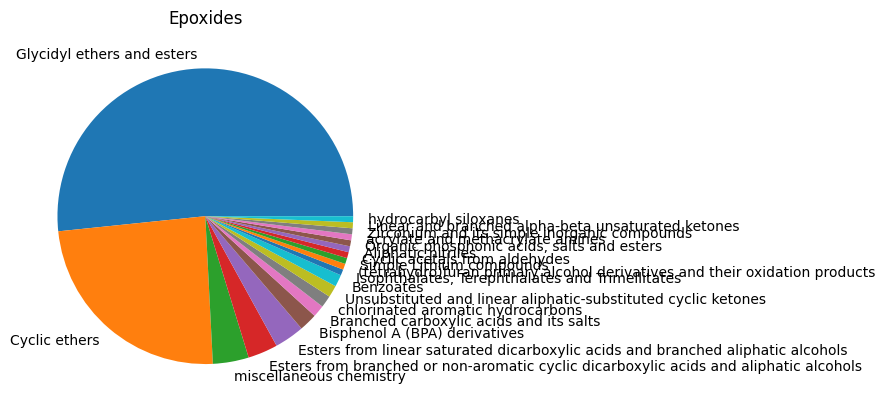

In [242]:
category = 'Epoxides'
category_chems = all_groups.loc[all_groups[category]==1]
arn_values = category_chems['predicted group 1'].value_counts()
plt.pie(arn_values.values, labels = arn_values.index)
plt.title(category)
plt.show()

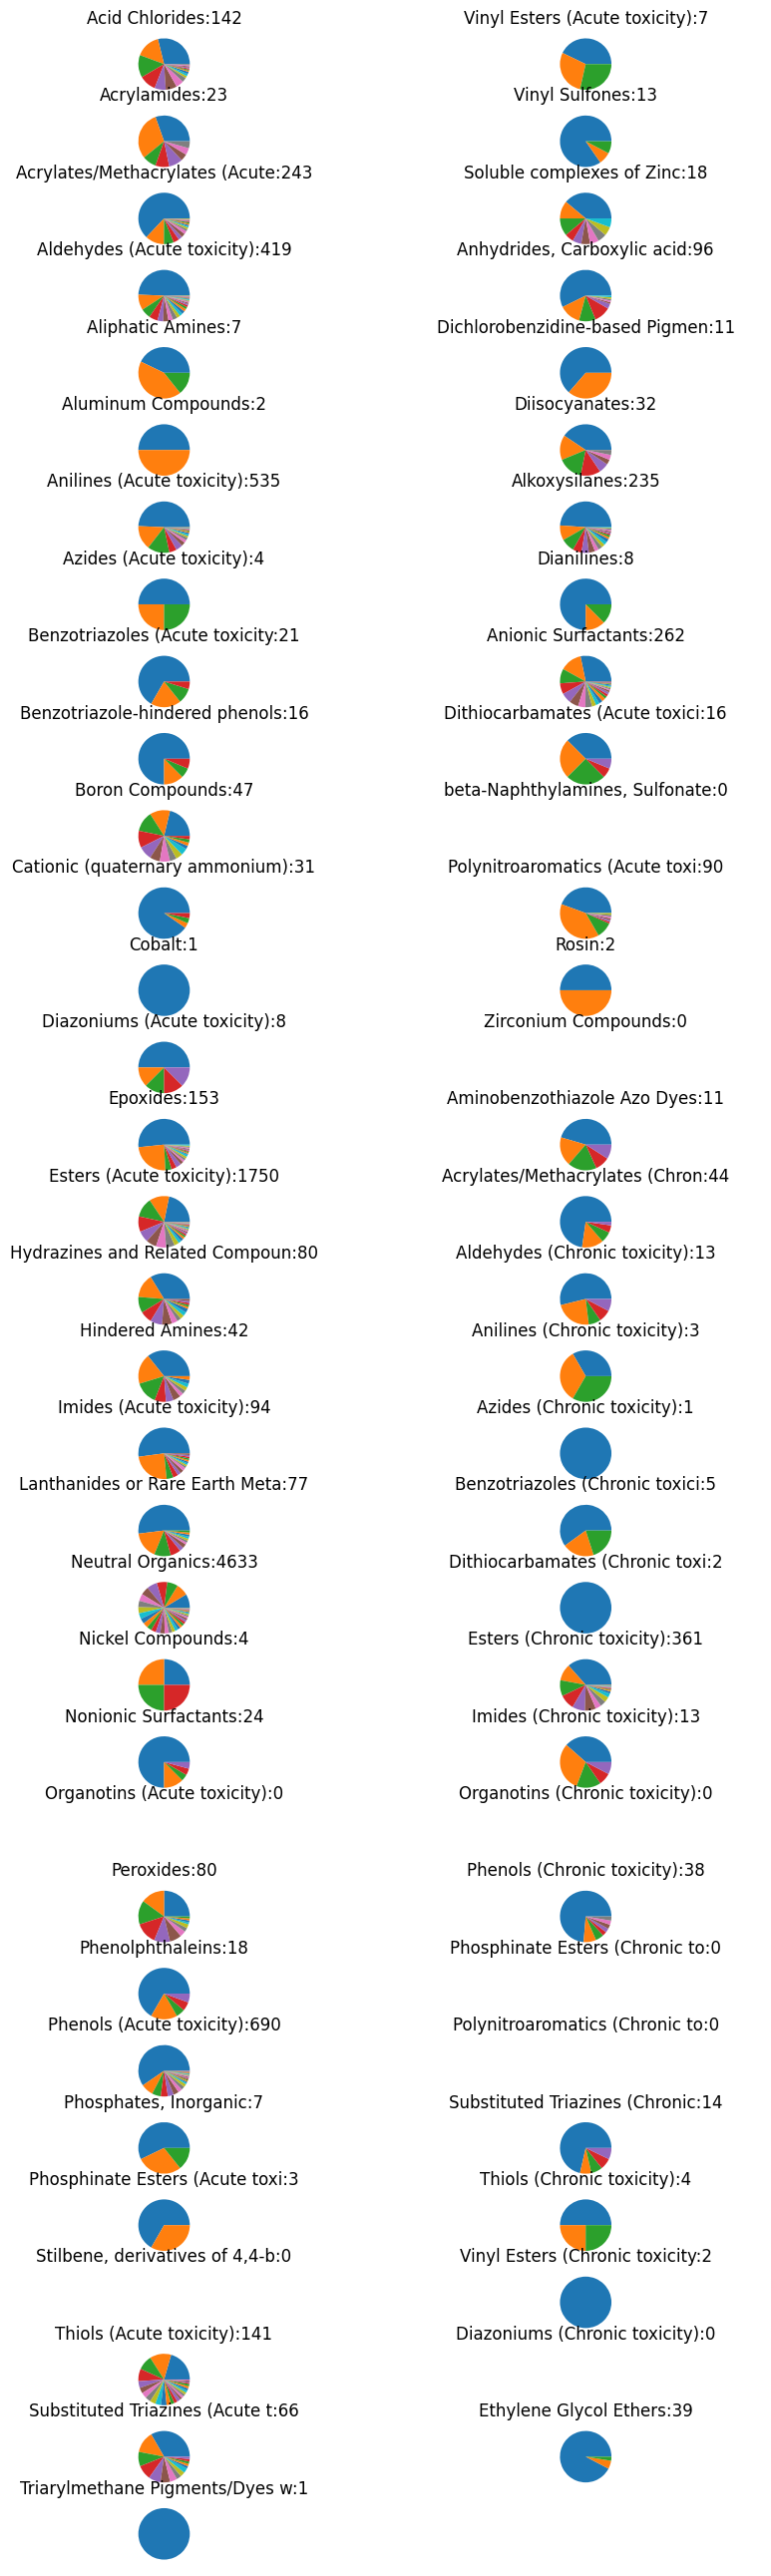

In [243]:
#Showing how NCC categories are composed in terms of ARN categories
fig, axs = plt.subplots(33,2)
for i in range(33):
    category = epa_categories[i]
    category_chems = all_groups.loc[all_groups[category]==1]
    arn_values = category_chems['predicted group 1'].value_counts()
    axs[i,0].pie(arn_values.values, labels = ['' for _ in arn_values.index])
    axs[i,0].set_title(category[:30] + f':{len(category_chems)}')

for j in range(32):
    i = j + 33
    category = epa_categories[i]
    category_chems = all_groups.loc[all_groups[category]==1]
    arn_values = category_chems['predicted group 1'].value_counts()
    axs[j,1].pie(arn_values.values, labels = ['' for _ in arn_values.index])
    axs[j,1].set_title(category[:30] + f':{len(category_chems)}')

axs[-1,-1].axis('off')
fig.set_figheight(33)
fig.set_figwidth(10)
plt.show()
# plt.savefig('../outputs/ncc_arn_composition_pies.png')


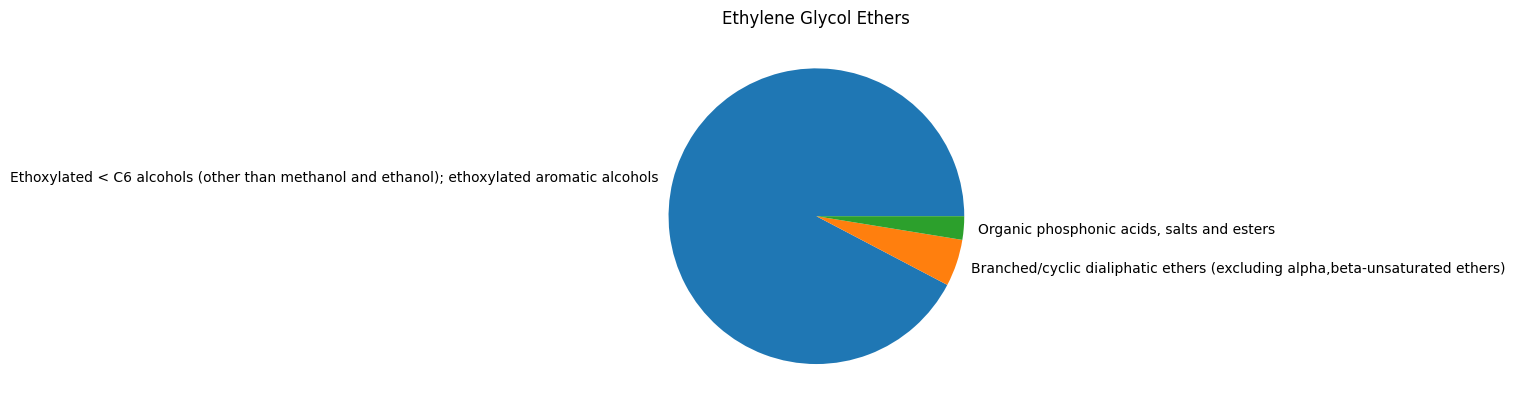

In [244]:
category = 'Ethylene Glycol Ethers'
category_chems = all_groups.loc[all_groups[category]==1]
arn_values = category_chems['predicted group 1'].value_counts()
plt.pie(arn_values.values, labels = arn_values.index)
plt.title(category)
plt.show()

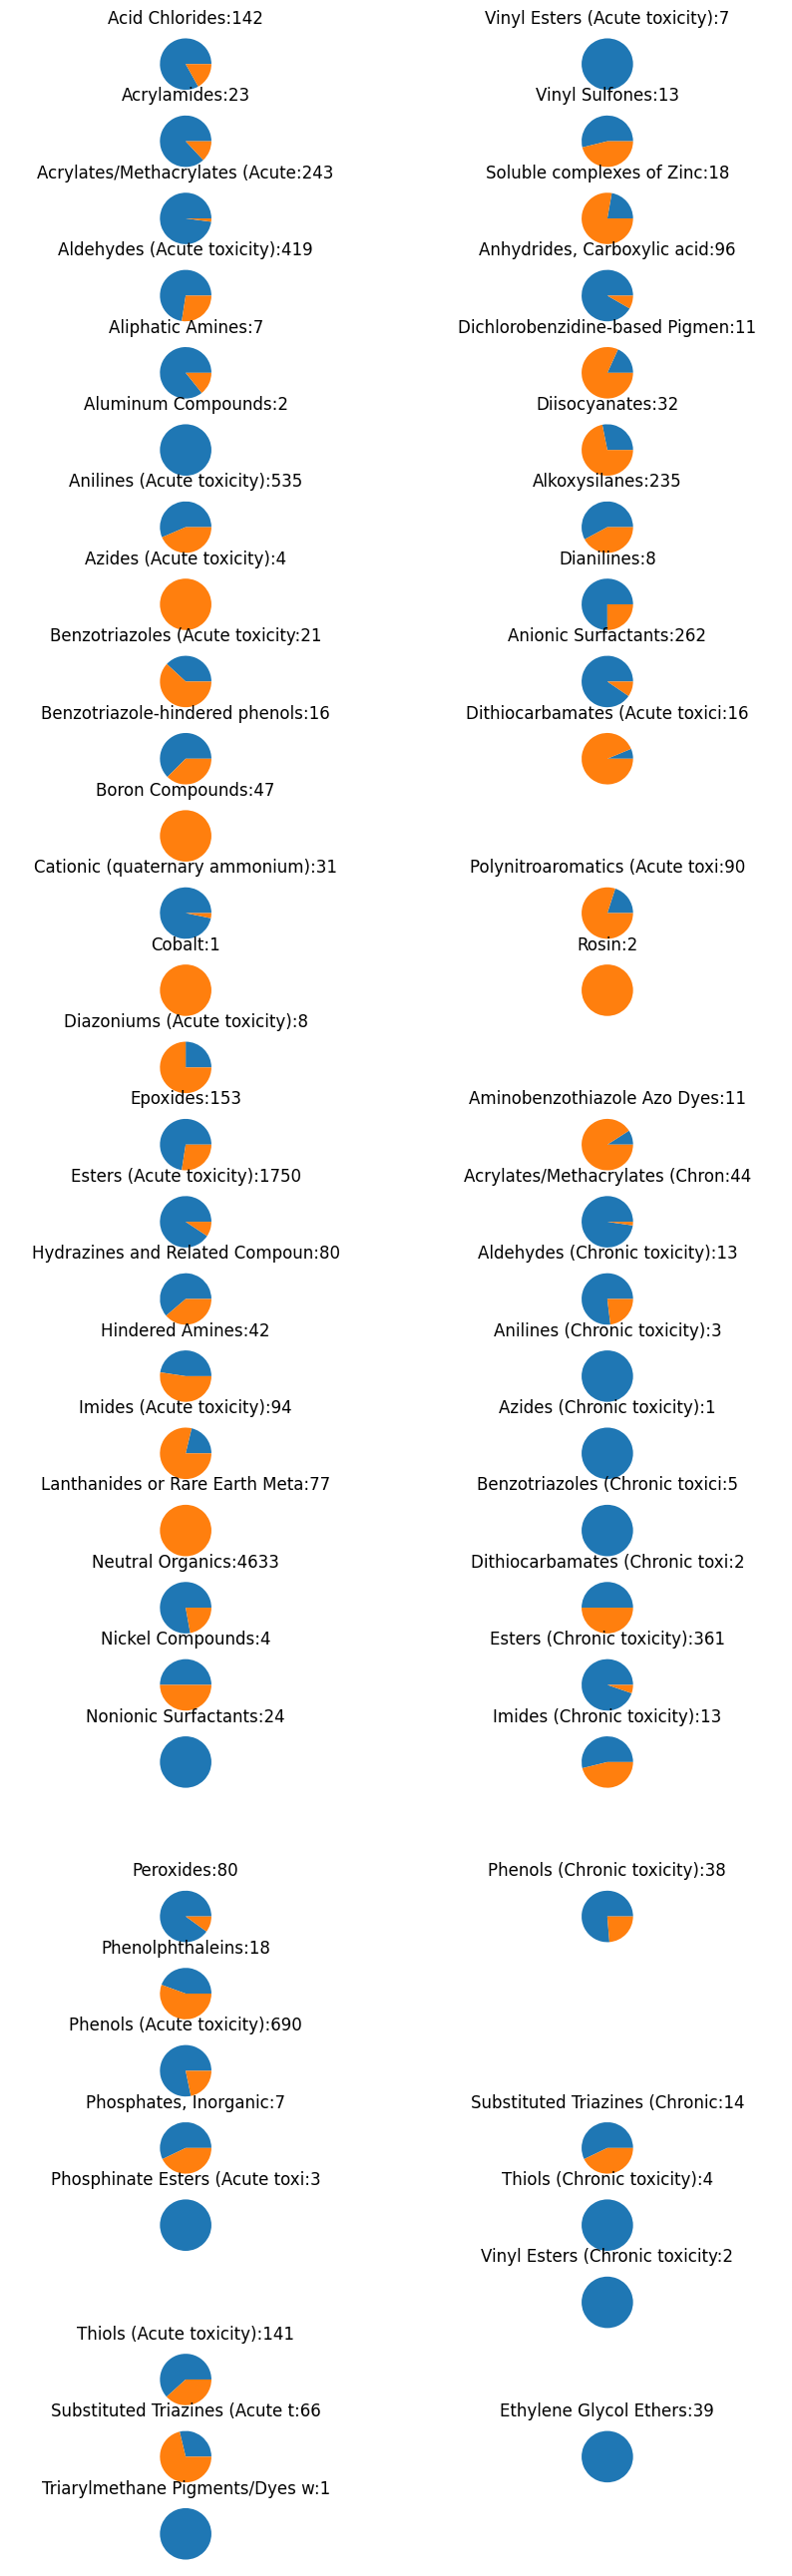

In [245]:
#Showing NCC categories in terms of how many of them are categorized at all by ARN

fig, axs = plt.subplots(33,2)
for i in range(33):
    category = epa_categories[i]
    category_chems = all_groups.loc[all_groups[category]==1]
    if len(category_chems)>0:
        trues = len(category_chems.loc[category_chems['in domain']==True])
        falses = len(category_chems) - trues
        axs[i,0].pie([trues, falses], labels = ['', ''])
        axs[i,0].set_title(category[:30] + f':{len(category_chems)}')
    else:
        axs[i,0].axis('off')

for j in range(32):
    i = j + 33
    category = epa_categories[i]
    category_chems = all_groups.loc[all_groups[category]==1]
    if len(category_chems)>0:
        trues = len(category_chems.loc[category_chems['in domain']==True])
        falses = len(category_chems) - trues
        axs[j,1].pie([trues, falses], labels = ['', ''])
        axs[j,1].set_title(category[:30] + f':{len(category_chems)}')
    else:
        axs[j,1].axis('off')

axs[-1,-1].axis('off')
fig.set_figheight(33)
fig.set_figwidth(10)
plt.show()
# plt.savefig('../outputs/ncc_in_arn_domain_pie.png')


In [246]:
in_domain_only

dtxsid        CASRN  \
0       DTXSID4063036    3452-09-3   
1      DTXSID30870753     693-02-7   
2       DTXSID7062374    2396-65-8   
3       DTXSID9061097     765-13-9   
4       DTXSID1061233     871-84-1   
...               ...          ...   
14211   DTXSID1074961   40615-39-2   
14212  DTXSID30887447   68517-02-2   
14214  DTXSID70889405  106253-69-4   
14216   DTXSID3073052  110726-28-8   
14217   DTXSID7031531     129-73-7   

                                                  smiles  \
0                                             CCCCCCCC#C   
1                                                CCCCC#C   
2                                            C#CCCCCCC#C   
3                                       CCCCCCCCCCCCCC#C   
4                                             C#CCCCCC#C   
...                                                  ...   
14211  COC1=CC=C(C=C1)C(OC[C@H]1O[C@H](C[C@@H]1O)N1C=...   
14212  CCC(C1=CC=C(OCC2CO2)C=C1)(C1=CC=C(OCC2CO2)C=C1...   
14214  CC1=C(C=CC=C1N1CC(COC2=CC=C(C=C2)C(C2=CC=C(OCC...   
14216  CC(C)(C1=CC=C(O)C=C1)C1=CC=C(C=C1)C(C)(C1=CC=C...   
14217  CN(C)C1=CC=C(C=C1)C(C1=CC=CC=C1)C1=CC=C(C=C1)N...   

                                 NCC           ClassyFire  \
0              ('Neutral Organics',)           Acetylides   
1              ('Neutral Organics',)           Acetylides   
2              ('Neutral Organics',)           Acetylides   
3              ('Neutral Organics',)           Acetylides   
4              ('Neutral Organics',)           Acetylides   
...                              ...                  ...   
14211                            NaN  Triphenyl compounds   
14212                  ('Epoxides',)  Triphenyl compounds   
14214                            NaN  Triphenyl compounds   
14216  ('Phenols (Acute toxicity)',)  Triphenyl compounds   
14217                            NaN  Triphenyl compounds   

                              group  \
0               ('Acetylides', nan)   
1               ('Acetylides', nan)   
2               ('Acetylides', nan)   
3               ('Acetylides', nan)   
4               ('Acetylides', nan)   
...                             ...   
14211  ('Triphenyl compounds', nan)   
14212  ('Triphenyl compounds', nan)   
14214  ('Triphenyl compounds', nan)   
14216  ('Triphenyl compounds', nan)   
14217  ('Triphenyl compounds', nan)   

                                       predicted group 1  \
0                                     Aliphatic nitriles   
1                                     Aliphatic nitriles   
2                                     Aliphatic nitriles   
3                                     Aliphatic nitriles   
4                                     Aliphatic nitriles   
...                                                  ...   
14211  Phthalic anhydrides and hydrogenated phthalic ...   
14212                         Glycidyl ethers and esters   
14214                         Glycidyl ethers and esters   
14216                           Miscellaneous bisphenols   
14217                                      aralkylamines   

                                predicted group 2  \
0      Organic phosphonic acids, salts and esters   
1                        Simple Lithium compounds   
2      primary aliphatic diamines and their salts   
3      Organic phosphonic acids, salts and esters   
4                        Simple Lithium compounds   
...                                           ...   
14211                     miscellaneous chemistry   
14212               Bisphenol A (BPA) derivatives   
14214                     miscellaneous chemistry   
14216               Bisphenol A (BPA) derivatives   
14217           chlorinated aromatic hydrocarbons   

                                       predicted group 3  \
0                               Simple Lithium compounds   
1             Organic phosphonic acids, salts and esters   
2                               Simple Lithium compounds   
3                               Simpl

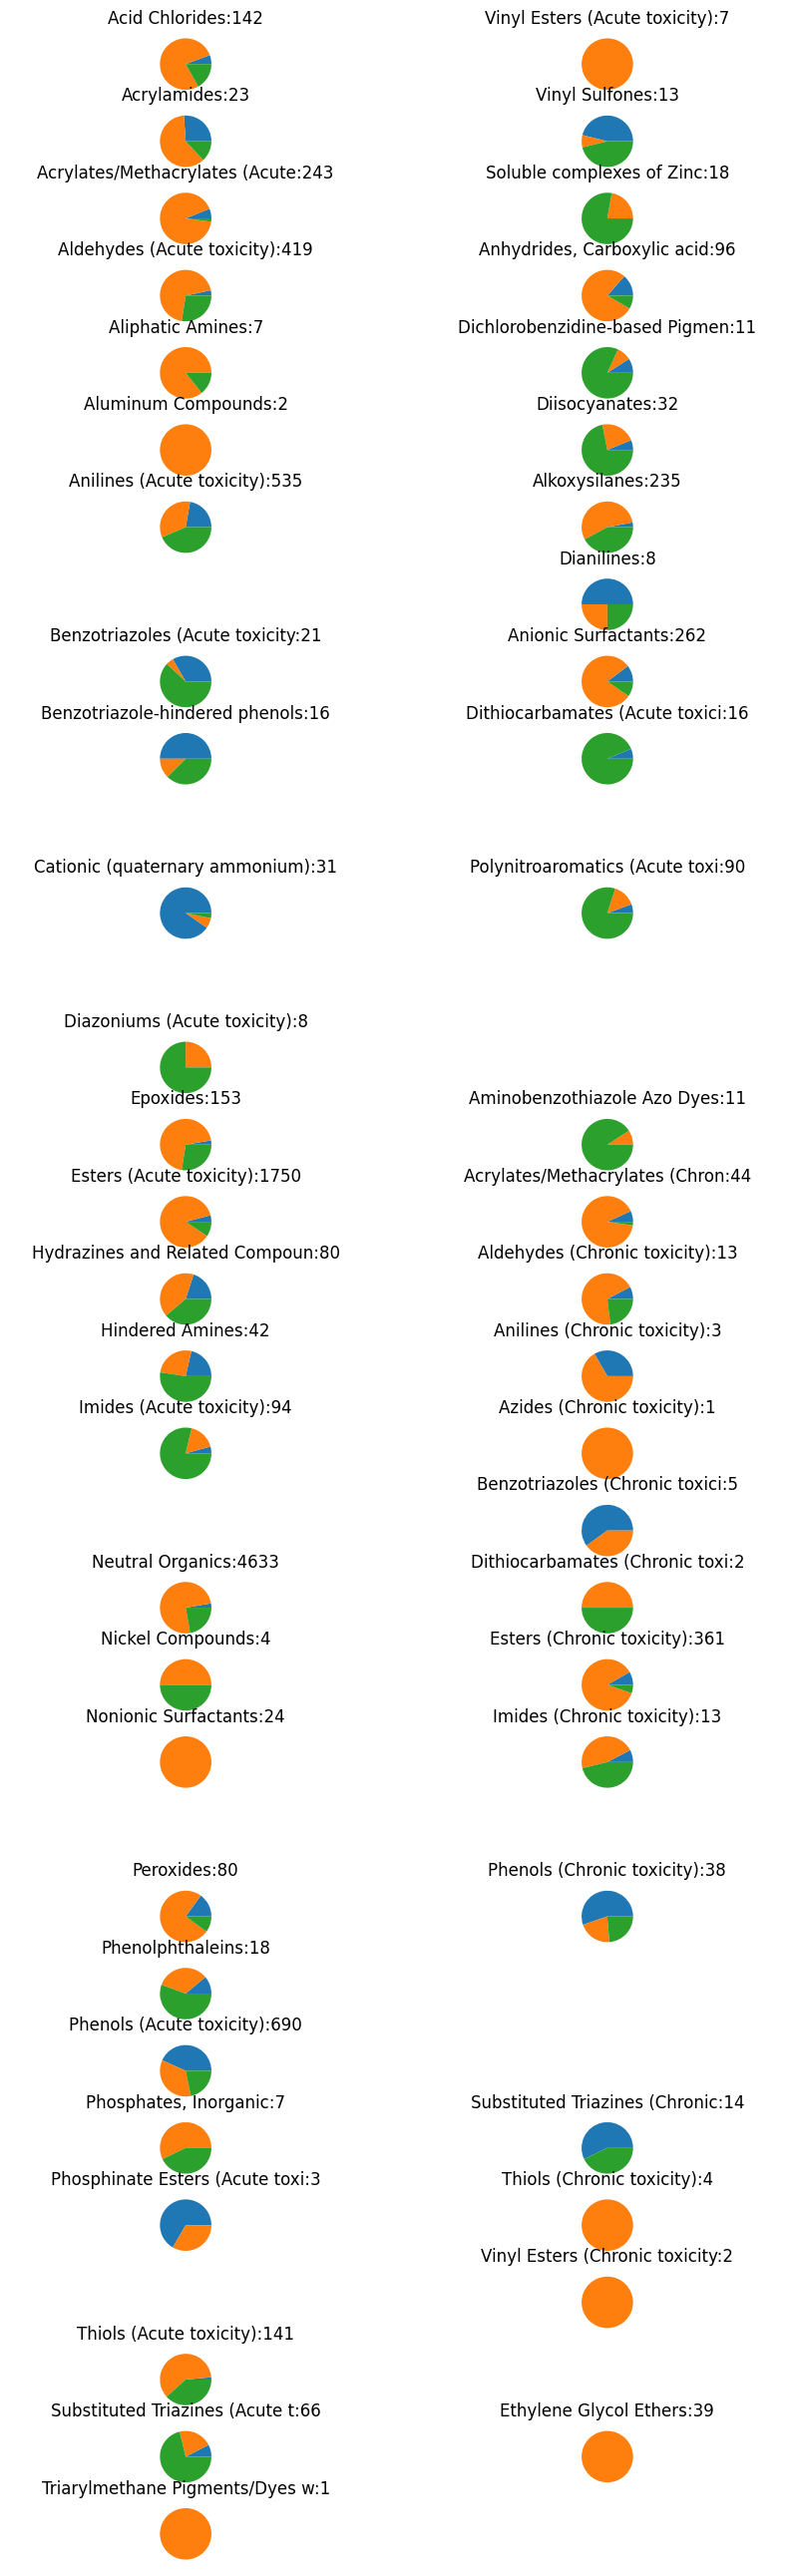

In [247]:
#Showing NCC categories in terms of how many are sorted into miscellaneous chemistry
labels = ['miscellaneous chemistry', 'other', 'out of domain']

fig, axs = plt.subplots(33,2)
for i in range(33):
    category = epa_categories[i]
    red_category_chems = in_domain_only.loc[in_domain_only[category]==1]
    category_chems = all_groups.loc[all_groups[category]==1]
    if len(red_category_chems)>0:
        trues = len(red_category_chems.loc[red_category_chems['predicted group 1']=='miscellaneous chemistry'])
        falses = len(red_category_chems) - trues
        outs = len(category_chems)-len(red_category_chems)
        axs[i,0].pie([trues,falses, outs], labels = None)
        axs[i,0].set_title(category[:30] + f':{len(category_chems)}')
    else:
        axs[i,0].axis('off')

for j in range(32):
    i = j + 33
    category = epa_categories[i]
    red_category_chems = in_domain_only.loc[in_domain_only[category]==1]
    category_chems = all_groups.loc[all_groups[category]==1]
    if len(red_category_chems)>0:
        trues = len(red_category_chems.loc[red_category_chems['predicted group 1']=='miscellaneous chemistry'])
        falses = len(red_category_chems) - trues
        outs = len(category_chems) - len(red_category_chems)
        axs[j,1].pie([trues, falses, outs], labels = None)
        axs[j,1].set_title(category[:30] + f':{len(category_chems)}')
    else:
        axs[j,1].axis('off')

axs[-1,-1].axis('off')
fig.set_figheight(33)
fig.set_figwidth(10)
plt.show()
# plt.savefig('../outputs/ncc_miscellaneous_chemistry_pie.png')


In [248]:
category = arn_categories[12]
category_chems = all_groups.loc[all_groups['predicted group 1'] == category]
total = len(category_chems)
compositions = {'ncc_cat':[], 'count':[]}
for j in epa_categories:
    count = sum(category_chems[j])
    if count > 0:
        compositions['ncc_cat'].append(j)
        compositions['count'].append(count/total)

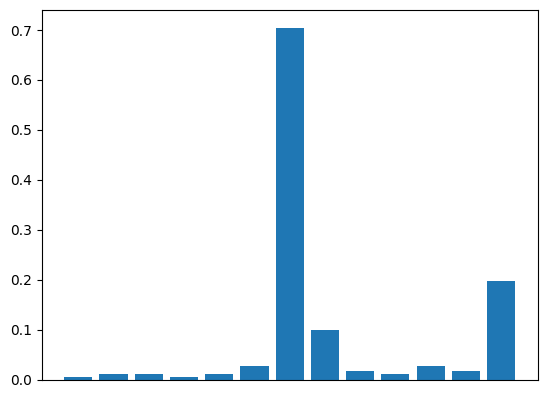

In [249]:
plt.bar(compositions['ncc_cat'], compositions['count'])
plt.xticks([])
plt.show()

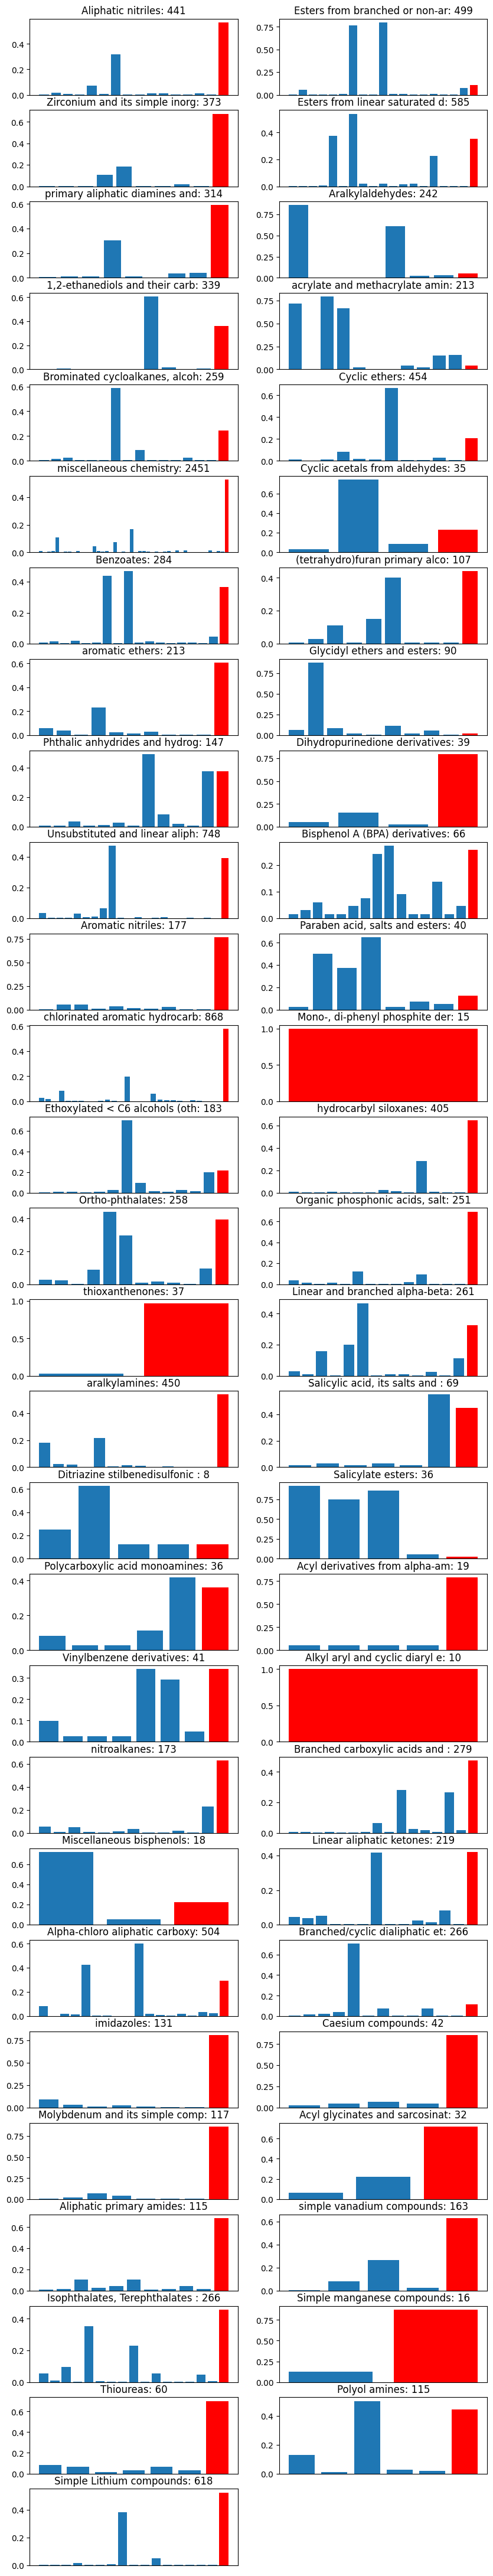

In [250]:
#Repeating this process, but to view ARN category compositions in terms of NCC categories
fig, axs = plt.subplots(28,2)

#Iterate through ARN categories to create graphs
for i in range(28):
    category = arn_categories[i]
    category_chems = all_groups.loc[all_groups['predicted group 1'] == category]
    total = len(category_chems)
    compositions = {'ncc_cat':[], 'count':[]}
    for j in epa_categories:
        count = sum(category_chems[j])
        if count > 0:
            compositions['ncc_cat'].append(j)
            compositions['count'].append(count/total)

    # Add in a bar for uncategorized chemicals, this will always be the last bar in the chart
    compositions['ncc_cat'].append('uncategorized')
    uncat_by_ncc = len(category_chems.loc[category_chems['epa_list']=='[]'])
    compositions['count'].append(uncat_by_ncc/total)

    #Produce the graphs
    axs[i,0].bar(compositions['ncc_cat'], compositions['count'])
    axs[i,0].bar(compositions['ncc_cat'], [0 for _ in compositions['count'][:-1]]+[uncat_by_ncc/total], color = 'red')    
    axs[i,0].set_title(category[:30] + f': {total}')
    axs[i,0].set_xticks([])

# Iterate through the rest of the categories for the second column of graphs
for i in range(27):
    j = i + 28
    category = arn_categories[j]
    category_chems = all_groups.loc[all_groups['predicted group 1'] == category]
    total = len(category_chems)
    compositions = {'ncc_cat':[], 'count':[]}
    for k in epa_categories:
        count = sum(category_chems[k])
        if count > 0:
            compositions['ncc_cat'].append(k)
            compositions['count'].append(count/total)

    # Add in a bar for uncategorized chemicals, this will always be the last bar in the chart
    compositions['ncc_cat'].append('uncategorized')
    uncat_by_ncc = len(category_chems.loc[category_chems['epa_list']=='[]'])
    compositions['count'].append(uncat_by_ncc/total)

    #Produce the graphs
    axs[i,1].bar(compositions['ncc_cat'], compositions['count'])
    #Red will represent data uncategorized by NCC
    axs[i,1].bar(compositions['ncc_cat'], [0 for _ in compositions['count'][:-1]]+[uncat_by_ncc/total], color = 'red')
    axs[i,1].set_title(category[:30] + f': {total}')
    axs[i,1].set_xticks([])

# Knock off the invisible last graph and set up figure size
axs[-1,-1].axis('off')
fig.set_figheight(56)
fig.set_figwidth(10)

plt.show()
    

In [251]:
indexer = []
for i in range(len(all_groups)):
    x = all_groups['epa_list'][i]!='[]'
    y = all_groups['in domain'][i]==True
    if x or y:
        indexer.append(True)
    else:
        indexer.append(False)

len(all_groups.loc[indexer])

11576

In [252]:
len(all_groups) - 11576

2642

In [253]:
# Percentage of each ARN category that is not categorized by NCC
arn_without_ncc_df = {'arn_category':[], 'percent_no_ncc':[], 'total':[]}
for category in in_domain_only['predicted group 1'].unique():
    set_in_domain = in_domain_only.loc[in_domain_only['predicted group 1']==category]
    uncat_by_ncc = len(set_in_domain.loc[set_in_domain['epa_list']=='[]'])/len(set_in_domain)
    arn_without_ncc_df['arn_category'].append(category)
    arn_without_ncc_df['percent_no_ncc'].append(round(100*uncat_by_ncc,2))
    arn_without_ncc_df['total'].append(len(set_in_domain))
arn_without_ncc_df = pd.DataFrame(arn_without_ncc_df).sort_values('percent_no_ncc',ascending=False).reset_index(drop = True)
arn_without_ncc_df

arn_category  percent_no_ncc  total
0   Alkyl aryl and cyclic diaryl esters of phospho...          100.00     10
1                 Molybdenum and its simple compounds          100.00     12
2              Mono-, di-phenyl phosphite derivatives          100.00     15
3                                     thioxanthenones           95.45     22
4         Dialkyl (and diaryl) dithiophosphates (DDP)           94.12     17
5                      Dihydropurinedione derivatives           93.75     16
6                                          imidazoles           89.06     64
7                           simple vanadium compounds           84.62     13
8   Acyl derivatives from alpha-amino acids other ...           78.95     19
9                                   Aromatic nitriles           78.83    137
10                                          Thioureas           76.67     30
11                           Aliphatic primary amides           76.09     92
12                                       nitroalkanes           74.32     74
13                   Acyl glycinates and sarcosinates           71.88     32
14         Organic phosphonic acids, salts and esters           71.78    202
15                         Simple manganese compounds           71.43      7
16                              hydrocarbyl siloxanes           65.80    231
17         primary aliphatic diamines and their salts           62.50    248
18                                  Caesium compounds           60.00      5
19                                 Aliphatic nitriles           58.50    306
20                                    aromatic ethers           58.46    195
21                                      aralkylamines           53.97    365
22                  chlorinated aromatic hydrocarbons           52.87    575
23  (tetrahydro)furan primary alcohol derivatives ...           52.24     67
24                            miscellaneous chemistry           47.95   1339
25            Branched carboxylic acids and its salts           46.77    248
26    Isophthalates, Terephthalates and Trimellitates           46.04    265
27                                      Polyol amines           43.48     92
28  Salicylic acid, its salts and alkylated deriva...           42.19     64
29                           Linear aliphatic ketones           38.81    201
30                                   Ortho-phthalates           38.71    248
31  Polycarboxylic acid monoamines, hydroxy deriva...           38.24     34
32                           Simple Lithium compounds           37.24    239
33                                          Benzoates           33.58    268
34                           Vinylbenzene derivatives           33.33     39
35  Esters from linear saturated dicarboxylic acid...           31.99    547
36  Unsubstituted and linear aliphatic-substituted...           31.12    347
37               1,2-ethanediols and their carbonates           30.60    268
38     Alpha-chloro aliphatic carboxylate derivatives           29.02    417
39  Linear and branched alpha-beta unsaturated ket...           27.91    215
40                      Bisphenol A (BPA) derivatives           26.15     65
41                           Miscellaneous bisphenols           23.53     17
42       Zirconium and its simple inorganic compounds           21.43     42
43  Ethoxylated < C6 alcohols (other than methanol...           20.93    172
44  Phthalic anhydrides and hydrogenated phthalic ...           16.88     77
45  Ditriazine stilbenedisulfonic acid dyes (optic...           16.67      6
46  Brominated cycloalkanes, alcohols, phosphates,...           15.57    167
47                      Cyclic acetals from aldehydes           13.64     22
48                                      Cyclic ethers           12.18    156
49  Branched/cyclic dialiphatic ethers (excluding ...           10.00    180
50                     Paraben acid, salts and esters            7.89     38
51  Esters from branched or non-aroma

In [254]:
arn_of_interest = 'Cyclic ethers'
df = pd.DataFrame(all_groups.loc[all_groups['in domain'] == True].loc[all_groups['predicted group 1'] == arn_of_interest].loc[:,epa_categories].sum(), columns = ['Group Members in NCC Category'])
df.loc[df['Group Members in NCC Category']>0]

Group Members in NCC Category
Epoxides                                             10
Esters (Acute toxicity)                               1
Neutral Organics                                    123
Phenols (Acute toxicity)                              2
Thiols (Acute toxicity)                               1
Alkoxysilanes                                         3

In [255]:
# Check how many newly categorized chemicals we would get if we set the cutoff value at a certain percent uncategorized
cutoff = 50
reduced_set = arn_without_ncc_df.loc[arn_without_ncc_df['percent_no_ncc'] >= cutoff]
(reduced_set.iloc[:,1]*reduced_set.iloc[:,2]/100).sum()

np.float64(1739.9926999999998)

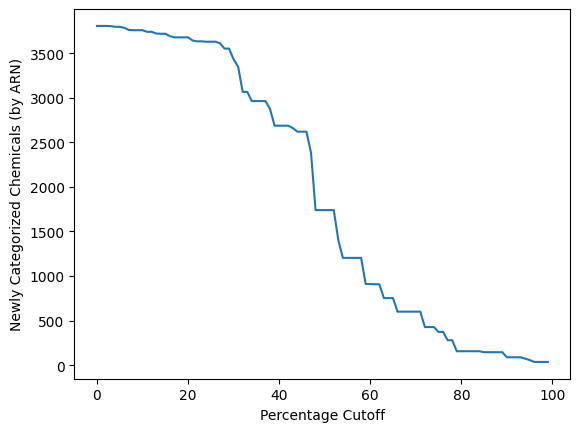

In [256]:
# Plot this as a graph
x = []
y = []
for i in range(100):
    cutoff = i
    reduced_set = arn_without_ncc_df.loc[arn_without_ncc_df['percent_no_ncc'] >= cutoff]
    output = (reduced_set.iloc[:,1]*reduced_set.iloc[:,2]/100).sum()
    x.append(i)
    y.append(output)

plt.plot(x, y)
plt.xlabel('Percentage Cutoff')
plt.ylabel('Newly Categorized Chemicals (by ARN)')
plt.show()

# Which ARN categories only show up in NCC-covered chems vs. add novel information?

In [257]:
uncat_by_ncc = all_groups.loc[all_groups['epa_list'] =='[]'].loc[all_groups['in domain'] == True]
cat_by_ncc = all_groups.loc[all_groups['epa_list'] !='[]'].loc[all_groups['in domain'] == True]

arn_for_uncat = uncat_by_ncc['predicted group 1'].unique()
arn_for_cat = cat_by_ncc['predicted group 1'].unique()

only_uncat = set(arn_for_uncat) - set(arn_for_cat)
only_uncat

{'Alkyl aryl and cyclic diaryl esters of phosphoric acid',
 'Molybdenum and its simple compounds',
 'Mono-, di-phenyl phosphite derivatives'}

In [258]:
set(arn_for_cat) - set(arn_for_uncat)

{'Salicylate esters'}

In [259]:
for group in only_uncat:
    print(f"{group}: {len(all_groups.loc[all_groups['in domain'] == True].loc[all_groups['predicted group 1']== group])}")

Mono-, di-phenyl phosphite derivatives: 15
Molybdenum and its simple compounds: 12
Alkyl aryl and cyclic diaryl esters of phosphoric acid: 10


In [260]:
group = 'Salicylate esters'
print(f"{group}: {len(all_groups.loc[all_groups['in domain'] == True].loc[all_groups['predicted group 1']== group])}")

Salicylate esters: 35


In [261]:
all_groups.loc[all_groups['in domain']==True].loc[all_groups['predicted group 1'] == 'Salicylate esters'][['Esters (Chronic toxicity)', 'Esters (Acute toxicity)', 'Neutral Organics', 'Phenols (Acute toxicity)', 'Phenols (Chronic toxicity)']]

Esters (Chronic toxicity)  Esters (Acute toxicity)  Neutral Organics  \
1119                           0                        1                 1   
1298                           0                        1                 1   
1606                           0                        1                 1   
1609                           0                        1                 0   
1618                           0                        1                 1   
1622                           0                        1                 1   
1645                           0                        1                 1   
1659                           0                        1                 1   
1667                           0                        1                 1   
1688                           0                        1                 1   
1694                           0                        1                 1   
1695                           0                        1                 0   
1697                           0                        1                 1   
1698                           0                        1                 1   
1707                           0                        1                 1   
1708                           0                        1                 1   
1718                           0                        1                 1   
1725                           0                        1                 1   
1738                           0                        1                 1   
1742                           0                        1                 1   
1746                           0                        1                 1   
1779                           0                        1                 1   
1785                           0                        1                 1   
1796                           0                        1                 1   
1838                           0                        1                 1   
1861                           0                        1                 1   
2161                           0                        1                 1   
2316                           0                        1                 0   
3565                           1                        0                 0   
7657                           0                        1                 0   
12413                          0                        1                 1   
12939                          1                        0                 1   
12953                          0                        1                 0   
12955                          0                        1                 0   
12998                          0                        1                 0   

       Phenols (Acute toxicity)  Phenols (Chronic toxicity)  
1119                          1                           0  
1298                          1                           0  
1606                          1                           0  
1609                          0                           0  
1618                          1                           0  
1622                          1                           0  
1645                          1                           0  
1659                          1                           0  
1667                          1                           0  
1688                          1                           0  
1694                          1                           0  
1695                          1                           0  
1697                          1                           0  
1698                          1                           0  
1707                          1                           0  
1708                          1                           0  
1718                          1                           0  
1725                          1               

Note: the Salicylate esters are all already categorized by NCC. They are all sorted into one of the Esters and Phenols groups, sometimes also with Neutral Organics. 

In [262]:
from ncc_categories.cats import printTree

# Internal NCC exploration: Are there redundant/subcategories?

In [263]:
for category in epa_categories:
    category_members = all_groups.loc[all_groups[category] == 1]
    if len(category_members) > 0:
        for possible_parent in epa_categories:
            if possible_parent == category:
                pass
            else:
                parent_cat_members = category_members.loc[category_members[possible_parent] == 1]
                if len(parent_cat_members) == len(category_members):
                    print(f"Check {category} and {possible_parent} for potential subcategory relationship. ({len(category_members)})")

Check Triarylmethane Pigments/Dyes with Non-solubilizing Groups and Phenols (Acute toxicity) for potential subcategory relationship. (1)
Check Vinyl Esters (Acute toxicity) and Esters (Acute toxicity) for potential subcategory relationship. (7)
Check Vinyl Esters (Acute toxicity) and Neutral Organics for potential subcategory relationship. (7)
Check Dianilines and Anilines (Acute toxicity) for potential subcategory relationship. (8)
Check Acrylates/Methacrylates (Chronic toxicity) and Esters (Chronic toxicity) for potential subcategory relationship. (44)
Check Vinyl Esters (Chronic toxicity) and Neutral Organics for potential subcategory relationship. (2)
Check Vinyl Esters (Chronic toxicity) and Esters (Chronic toxicity) for potential subcategory relationship. (2)
Check Ethylene Glycol Ethers and Neutral Organics for potential subcategory relationship. (39)


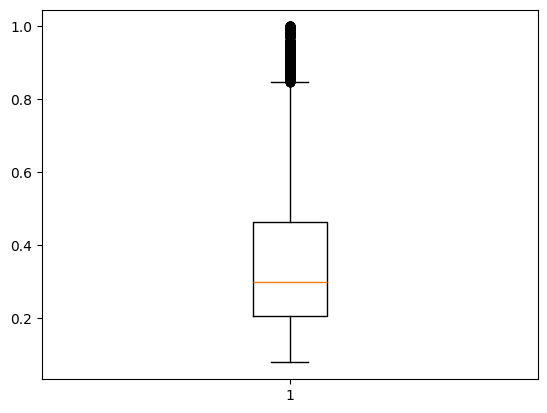

0.3011111111111111


In [264]:
plt.boxplot(all_groups.loc[all_groups['in domain']==True]['predicted group 1 probability'])
plt.show()
print(np.quantile(all_groups.loc[all_groups['in domain']==True]['predicted group 1 probability'].values, q = 0.5))

In [265]:
len(all_groups.loc[all_groups['in domain'] == True].loc[all_groups['predicted group 1 probability']>= 0.3011111111111111].loc[all_groups['epa_list']=='[]'])

2015

In [266]:
len(all_groups.loc[all_groups['in domain'] == True].loc[all_groups['predicted group 1 probability']>= 0.3011111111111111].loc[all_groups['epa_list']=='[]']['predicted group 1'].unique())

54

In [267]:
#This is a counter of all the truly sorted chemicals in the data set.
counter = 0
for _,x in all_groups.iterrows():
    if x['epa_list'] != '[]' or (x['in domain'] == True and x['predicted group 1'] != 'miscellaneous chemistry'):
        counter += 1
counter

10934

In [268]:
df = pd.read_excel('../data/raw/tsca_categorisation_071124_wmappingdict.xlsx')

# Looking at ClassyFire + Hierarchical Groups

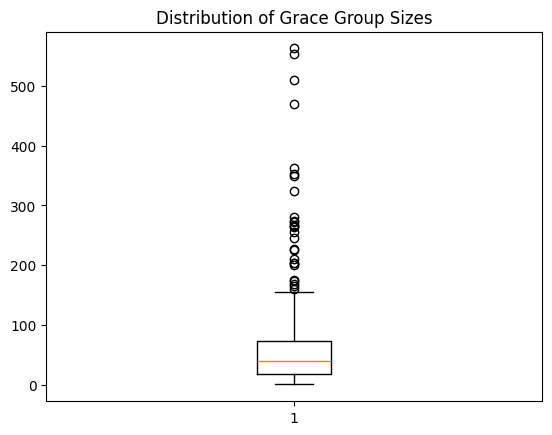

In [269]:
plt.boxplot(df['group'].value_counts())
plt.title('Distribution of Grace Group Sizes')
plt.show()

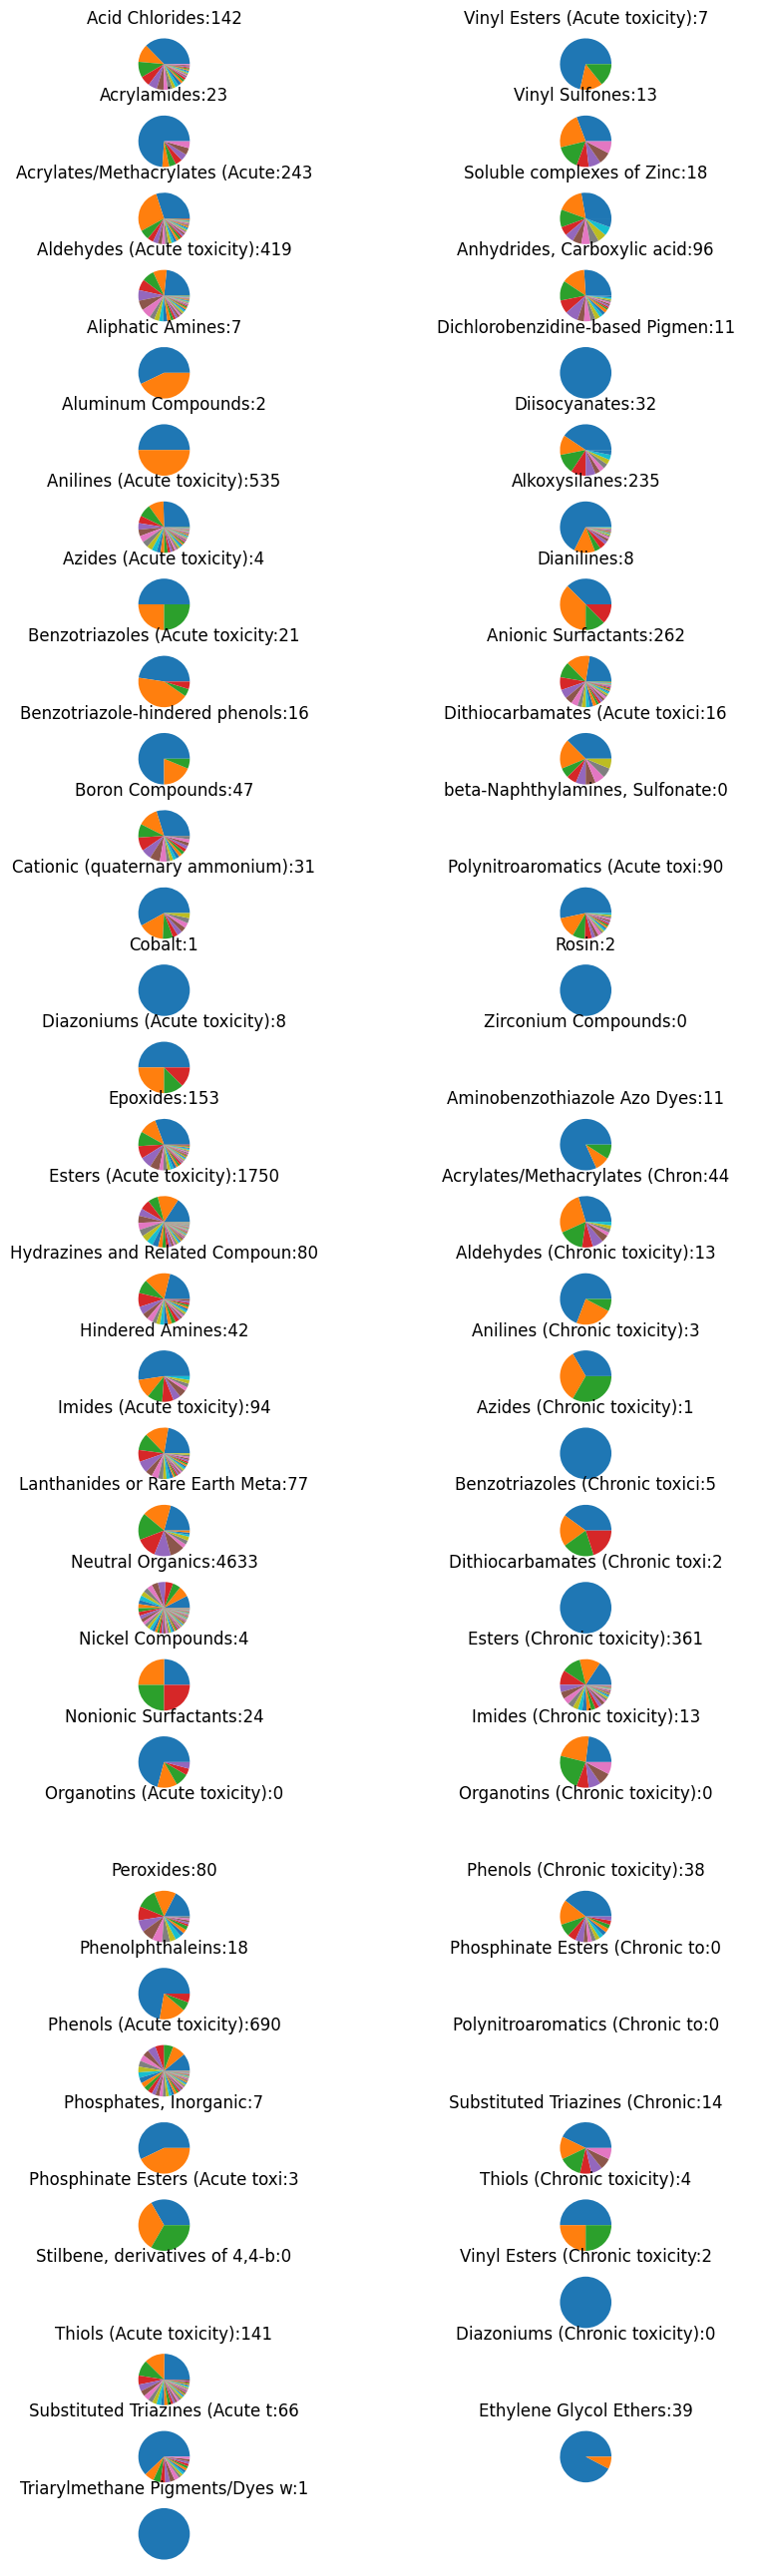

In [270]:
#Showing how NCC categories are composed in terms of ARN categories
fig, axs = plt.subplots(33,2)
for i in range(33):
    category = epa_categories[i]
    category_chems = all_groups.loc[all_groups[category]==1]
    arn_values = category_chems['group'].value_counts()
    axs[i,0].pie(arn_values.values, labels = ['' for _ in arn_values.index])
    axs[i,0].set_title(category[:30] + f':{len(category_chems)}')

for j in range(32):
    i = j + 33
    category = epa_categories[i]
    category_chems = all_groups.loc[all_groups[category]==1]
    arn_values = category_chems['group'].value_counts()
    axs[j,1].pie(arn_values.values, labels = ['' for _ in arn_values.index])
    axs[j,1].set_title(category[:30] + f':{len(category_chems)}')

axs[-1,-1].axis('off')
fig.set_figheight(33)
fig.set_figwidth(10)
plt.show()



In [271]:
all_groups.loc[all_groups['Substituted Triazines (Acute toxicity)'] == 1]['ClassyFire'].value_counts()

ClassyFire
Triazines                              41
Carboxylic acids and derivatives        5
Organic nitrogen compounds              5
Anthracenes                             3
Phenylpropanoids and polyketides        3
Naphthalenes                            2
Phenol ethers                           2
Benzene and substituted derivatives     1
Other                                   1
Organometallic compounds                1
Organoheterocyclic compounds            1
Phenols                                 1
Name: count, dtype: int64

In [272]:
# Check for ClassyFire Categories which may be contained inside NCC categories
for category in all_groups['ClassyFire'].unique():
    for group in epa_categories:
        if category in group:
            print(f'ClassyFire category {category} shares a name with NCC {group}.')

ClassyFire category Epoxides shares a name with NCC Epoxides.
ClassyFire category Phenols shares a name with NCC Phenols (Acute toxicity).
ClassyFire category Phenols shares a name with NCC Phenols (Chronic toxicity).
ClassyFire category Triazines shares a name with NCC Substituted Triazines (Acute toxicity).
ClassyFire category Triazines shares a name with NCC Substituted Triazines (Chronic toxicity).


In [273]:
# Check for ClassyFire Categories which may be contained inside NCC categories
for category in all_groups['ClassyFire'].unique():
    for group in arn_categories:
        if category in group:
            print(f'ClassyFire category {category} shares a name with ARN {group}.')

Looking at which ClassyFire categories get classified by NCC

In [320]:
all_groups.loc[all_groups['epa_list']=='[]']['ClassyFire'].value_counts()

ClassyFire
Benzene and substituted derivatives          1184
Organic nitrogen compounds                    478
Fatty Acyls                                   402
Organometallic compounds                      365
Carboxylic acids and derivatives              345
Mixed metal/non-metal compounds               344
Organooxygen compounds                        315
Organoheterocyclic compounds                  301
Organohalogen compounds                       232
Naphthalenes                                  217
Prenol lipids                                 168
Pyridines and derivatives                     146
Organosulfur compounds                        123
Azoles                                        109
Phenylpropanoids and polyketides               97
Homogeneous non-metal compounds                96
Other                                          95
Anthracenes                                    90
Diazines                                       85
Quinolines and derivatives             

In [321]:
overall_ranks = pd.DataFrame(all_groups['ClassyFire'].value_counts()).reset_index(drop = False).reset_index(drop = False).rename(columns = {'index':'overall_count_rank'})
no_ncc_ranks = pd.DataFrame(all_groups.loc[all_groups['epa_list']=='[]']['ClassyFire'].value_counts()).reset_index(drop = False).reset_index(drop = False).rename(columns = {'index':'no_ncc_count_rank'})
no_ncc_ranks['no_ncc_count_rank'] = no_ncc_ranks['no_ncc_count_rank'].astype('int')

In [322]:
ranks = overall_ranks.merge(no_ncc_ranks, how = 'left', on = 'ClassyFire').rename(columns = {'count_x':'total_count', 'count_y':'no_ncc_count'})
ranks['rank_change'] =  ranks['overall_count_rank'] - ranks['no_ncc_count_rank']
ranks.sort_values('rank_change').dropna()

overall_count_rank                                 ClassyFire  \
15                  15                                    Phenols   
12                  12                               Hydrocarbons   
33                  33                                   Lactones   
39                  39                 Keto acids and derivatives   
46                  46                              Phenol esters   
50                  50                             Organic oxides   
37                  37                                Benzofurans   
49                  49                                   Dioxanes   
35                  35                                Piperidines   
22                  22     Organic carbonic acids and derivatives   
5                    5                              Prenol lipids   
1                    1                     Organooxygen compounds   
28                  28                                 Azolidines   
13                  13                                Anthracenes   
19                  19                              Phenol ethers   
11                  11           Phenylpropanoids and polyketides   
36                  36                                Benzopyrans   
21                  21                                 Benzenoids   
18                  18                                Azobenzenes   
40                  40     Organic sulfonic acids and derivatives   
3                    3           Carboxylic acids and derivatives   
7                    7                    Organohalogen compounds   
48                  48                              Glycerolipids   
0                    0        Benzene and substituted derivatives   
2                    2                                Fatty Acyls   
17                  17                                      Other   
10                  10                               Naphthalenes   
8                    8               Organoheterocyclic compounds   
32                  32                             Benzothiazoles   
45                  45           Steroids and steroid derivatives   
27                  27              Organic acids and derivatives   
14                  14                     Organosulfur compounds   
56                  56                                 Acetylides   
4                    4                 Organic nitrogen compounds   
6                    6                   Organometallic compounds   
31                  31                Homogeneous metal compounds   
23                  23   Organic phosphoric acids and derivatives   
63                  63  Lignans, neolignans and related compounds   
41                  41               Organic oxoanionic compounds   
9                    9            Mixed metal/non-metal compounds   
30                  30                    Indoles and derivatives   
16                  16                  Pyridines and derivatives   
66                  66            Lipids and lipid-like molecules   
57                  57                                 Diazinanes   
25                  25                 Quinolines and derivatives   
29                  29   Organic phosphonic acids and derivatives   
20                  20                                     Azoles   
34                  34                              Organic salts   
53                  53                                    Indanes   
26                  26                                   Diazines   
64                  64          Miscellaneous inorganic compounds   
24                  24            Homogeneous non-metal compounds   
44                  44                   Heteroaromatic compounds   
67                  67                            Inorganic salts   
47                  47                 Isoindoles and derivatives   
42                  42                 Organophosphorus compounds   
61                  61                  Alkaloids and derivatives   
58

In [327]:
ranks['percent_unclassified'] = ranks['no_ncc_count']/ranks['total_count']
ranks.loc[ranks['total_count'] > 10].sort_values('percent_unclassified', ascending=False).head(10)

overall_count_rank                                ClassyFire  total_count  \
42                  42                Organophosphorus compounds           43   
54                  54                   Hydrocarbon derivatives           35   
60                  60   Nucleosides, nucleotides, and analogues           20   
29                  29  Organic phosphonic acids and derivatives           65   
59                  59             Organic 1,3-dipolar compounds           30   
34                  34                             Organic salts           58   
24                  24           Homogeneous non-metal compounds          108   
26                  26                                  Diazines           96   
52                  52                            Benzimidazoles           35   
16                  16                 Pyridines and derivatives          172   

    no_ncc_count_rank  no_ncc_count  rank_change  percent_unclassified  
42               31.0          43.0         11.0              1.000000  
54               33.0          34.0         21.0              0.971429  
60               46.0          19.0         14.0              0.950000  
29               23.0          61.0          6.0              0.938462  
59               40.0          27.0         19.0              0.900000  
34               27.0          52.0          7.0              0.896552  
24               15.0          96.0          9.0              0.888889  
26               18.0          85.0          8.0              0.885417  
52               37.0          30.0         15.0              0.857143  
16               11.0         146.0          5.0              0.848837

In [329]:
ranks.loc[ranks['total_count'] > 10].sort_values('percent_unclassified', ascending=False).dropna().tail(10)

overall_count_rank                  ClassyFire  total_count  \
57                  57                  Diazinanes           32   
37                  37                 Benzofurans           48   
12                  12                Hydrocarbons          204   
33                  33                    Lactones           58   
56                  56                  Acetylides           33   
39                  39  Keto acids and derivatives           46   
49                  49                    Dioxanes           38   
46                  46               Phenol esters           40   
15                  15                     Phenols          180   
50                  50              Organic oxides           38   

    no_ncc_count_rank  no_ncc_count  rank_change  percent_unclassified  
57               51.0           8.0          6.0              0.250000  
37               48.0          11.0        -11.0              0.229167  
12               41.0          26.0        -29.0              0.127451  
33               52.0           6.0        -19.0              0.103448  
56               54.0           3.0          2.0              0.090909  
39               55.0           3.0        -16.0              0.065217  
49               58.0           2.0         -9.0              0.052632  
46               59.0           2.0        -13.0              0.050000  
15               53.0           5.0        -38.0              0.027778  
50               62.0           1.0        -12.0              0.026316

In [323]:
set(overall_ranks['ClassyFire']) - set(no_ncc_ranks['ClassyFire'])

{'Allenes', 'Epoxides', 'Organic oxygen compounds', 'Oxanes', 'Triazines'}

# NCC Network Work

In [335]:
len(all_groups.loc[all_groups['in domain']==True].loc[all_groups['predicted group 1']=='miscellaneous chemistry'].loc[all_groups['epa_list']!= '[]'])

697

In [274]:
#The following code explores whether category membership is unique using the EPA Categories, and how this cross-membership 
#occurs
outputs = all_groups.loc[:,epa_categories]
column_list = list(outputs.columns)
ones = 0
ohs = 0
pluses = 0
groups = []
for i, row in outputs.iterrows():
    my_sum = sum(row.values[1:])
    if my_sum == 1:
        ones += 1
    elif my_sum == 0:
        ohs += 1
    else:
        pluses += 1
        row_list = list(row)
        indices = [i for i,x in enumerate(row_list) if x == True]
        group = [column_list[j] for j in indices]
        groups.append(indices)
ohs, ones, pluses

(6448, 5351, 2419)

In [275]:
# This should visualize which categories are often assigned to the same chemical together, requires the 
#NetworkX package
import networkx as nx

G = nx.Graph()

#Make a node for each Category
G.add_nodes_from([(k, {"label" :column_list[k]}) for k in range(1,len(column_list))])

#Construct the edges
edges = []
for group in groups:
    for i in range(len(group)):
        item = group[i]
        while i < len(group)-1:
            i += 1
            edges.append((item,group[i]))

G.add_edges_from(edges)


In [277]:
#For better visualization, these nodes should be removed from the visualization as they have no connections
no_connections = [29,23,63,58,27,35,37,59,46,53,56,12,13,43,21,51,19,56]
G.remove_nodes_from(no_connections)

for i in no_connections:
    print(column_list[i])

Stilbene, derivatives of 4,4-bis(triazin-2-ylamino)-
Organotins (Acute toxicity)
Diazoniums (Chronic toxicity)
Phosphinate Esters (Chronic toxicity)
Phosphates, Inorganic
Soluble complexes of Zinc
Dichlorobenzidine-based Pigments
Polynitroaromatics (Chronic toxicity)
Zirconium Compounds
Dithiocarbamates (Chronic toxicity)
Organotins (Chronic toxicity)
Cobalt
Diazoniums (Acute toxicity)
beta-Naphthylamines, Sulfonated
Nickel Compounds
Azides (Chronic toxicity)
Lanthanides or Rare Earth Metals
Organotins (Chronic toxicity)


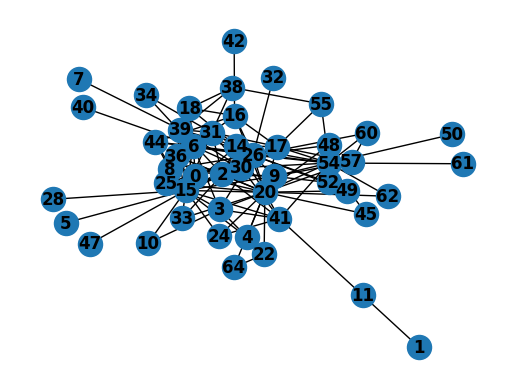

In [278]:
import matplotlib.pyplot as plt

ax1 = plt.plot()
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()


In [347]:
outputs.columns[1]

'Acrylamides'

In [341]:
# Show the categories for which no chemicals get assigned from our data set
no_members = []
for i in no_connections:
    if sum(outputs.iloc[:,i]) < 1:
        print(column_list[i])
        no_members.append(outputs.columns[i])

Stilbene, derivatives of 4,4-bis(triazin-2-ylamino)-
Organotins (Acute toxicity)
Diazoniums (Chronic toxicity)
Phosphinate Esters (Chronic toxicity)
Polynitroaromatics (Chronic toxicity)
Zirconium Compounds
Organotins (Chronic toxicity)
beta-Naphthylamines, Sulfonated
Organotins (Chronic toxicity)


In [283]:
for i in no_connections:
    if sum(outputs.iloc[:,i]) > 0:
        print(f'There are {outputs.iloc[:,i].sum()} members of {outputs.columns[i]}')

There are 7 members of Phosphates, Inorganic
There are 18 members of Soluble complexes of Zinc
There are 11 members of Dichlorobenzidine-based Pigments
There are 2 members of Dithiocarbamates (Chronic toxicity)
There are 1 members of Cobalt
There are 8 members of Diazoniums (Acute toxicity)
There are 4 members of Nickel Compounds
There are 1 members of Azides (Chronic toxicity)
There are 77 members of Lanthanides or Rare Earth Metals


In [343]:
set([outputs.columns[i] for i in no_connections]) - set(no_members)

{'Azides (Chronic toxicity)',
 'Cobalt',
 'Diazoniums (Acute toxicity)',
 'Dichlorobenzidine-based Pigments',
 'Dithiocarbamates (Chronic toxicity)',
 'Lanthanides or Rare Earth Metals',
 'Nickel Compounds',
 'Phosphates, Inorganic',
 'Soluble complexes of Zinc'}

# Category Heat Map

In [352]:
# Importing Dependencies
import seaborn as sns

In [359]:
#Selecting only chemicals categorized by both methods for the heatmap
view_df = all_groups.loc[:,epa_categories + ['predicted group 1']].loc[all_groups['in domain']==True].loc[all_groups['epa_list']!= '[]']

In [429]:
# Setting up numbers for computation
in_each_ncc = view_df.groupby('predicted group 1').sum()
in_each_arn = view_df.groupby('predicted group 1').count()

In [366]:
# Outputs percentage of members of each ARN category that are in each NCC
excel_export = in_each_ncc/in_each_arn
excel_export.to_excel('../outputs/arns_for_heatmap.xlsx')

In [ ]:
#Output the percentage of members of each NCC that are in each ARN category
total_per_ncc = view_df.sum()[epa_categories]
ncc_in_each_arn = view_df.groupby('predicted group 1').sum()

excel_export2 = ncc_in_each_arn/total_per_ncc
excel_export2 = excel_export2.fillna(0)
excel_export2.to_excel('../outputs/nccs_for_heatmap.xlsx')

C:\Users\aleary\AppData\Local\Temp\ipykernel_27776\2096360709.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  excel_export2 = excel_export2.fillna(0)


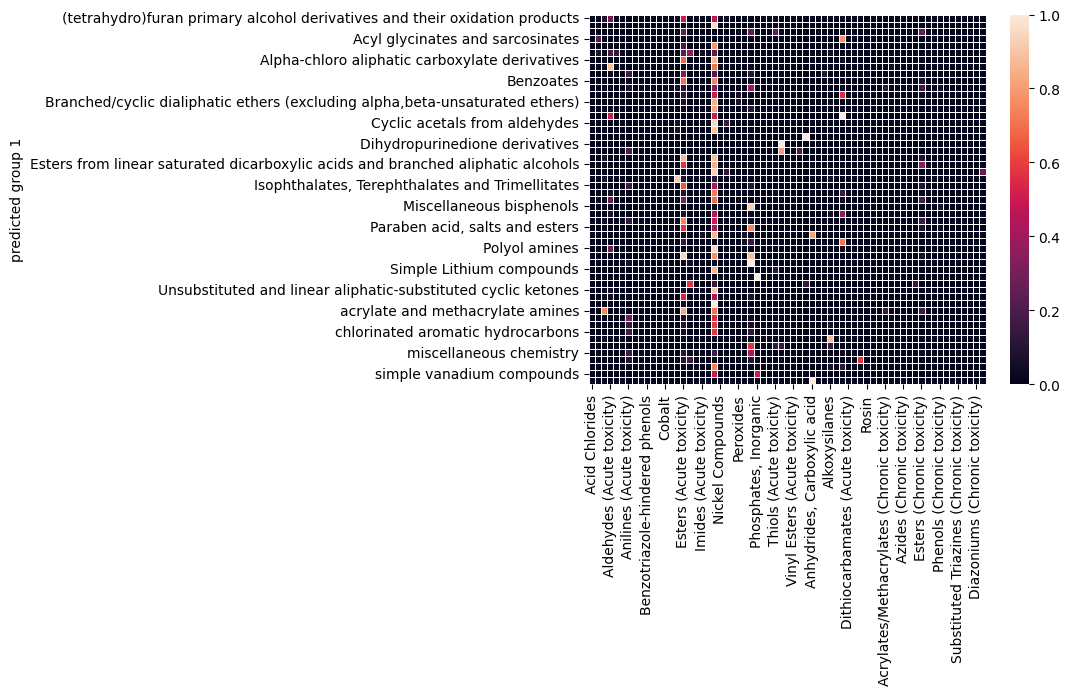

In [364]:
#The seaborn heatmap: difficult to read due to space constraints and misaligned labels, so transferred to Excel for ease-of-viewing
sns.heatmap(in_each_ncc/in_each_arn, annot=False, linewidths=0.5)
plt.show()

# Clustering the Chemicals

In order to cluster the chemicals, they were run through the 02-ajl-data_collection.ipynb processes for connecting fingerprints to them so that we would have multiple similarity contexts to consider. 

## KMeans

In [148]:
import pandas as pd

#Read in the fingerprint information
print_df = pd.read_csv('../data/raw/TSCA_fingerprints.csv').rename(columns = {'Unnamed:0':'dtxsid'})

### Preprocessing for Cluster Number

In [453]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
k = range(1,300)

X = print_df.iloc[:, 731:2779].dropna()

#Checking inertia and distortion for KMeans models using Morgan fingerprints to determine k
for i in k:
    model = KMeans(n_clusters=i, random_state=93).fit(X)

    distortions.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis = 1)**2)/X.shape[0])
    inertias.append(model.inertia_)
    mapping1[k] = [distortions][-1]
    mapping2[k] = inertias[-1]

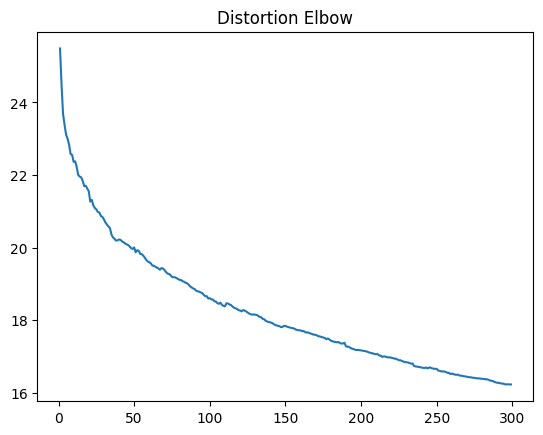

In [455]:
plt.plot(range(1,300), distortions)
plt.title('Distortion Elbow')
plt.show()

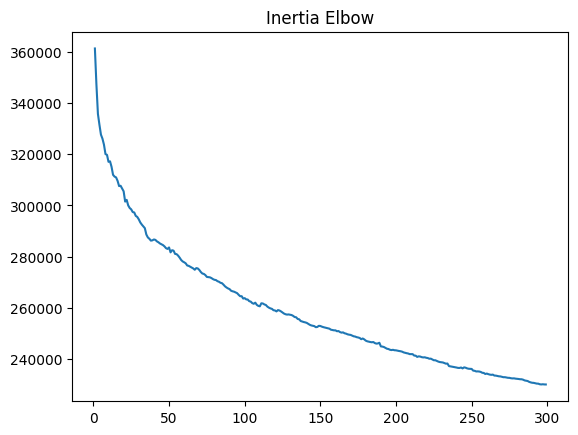

In [457]:
plt.plot(range(1,300), inertias)
plt.title('Inertia Elbow')
plt.show()

Both plots have elbows at approximately 75 clusters, so we will use that value for k.

### Cluster computation

In [2]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

#Compute the clusters using the parameters selected above
X = print_df.iloc[:, 731:2779].dropna()

labels = KMeans(n_clusters=75, random_state=93).fit_predict(X)

In [3]:
#Save the clusters to a document that can be easily merged with the other data
morgan_df = print_df.set_index('Unnamed: 0').iloc[:,730:2778].dropna()
morgan_df['KMeans'] =  labels

In [4]:
morgan_df.to_csv("../outputs/morgan_clusters.csv")

## KMeans with Jaccard

In [ ]:
from scipy.spatial.distance import jaccard
import numpy as np
import random

class KMediansModel:
    def __init__(self, k, random_seed = 42, max_iter = 1000):
        self.k = k
        self.random_seed = random_seed
        self.max_iter = max_iter
        self.labels = []
        self.inertia = None
        self.centroids = []
        self.fitted_data = None    

    def fit_predict(self, input_data):
        self.fitted_data = input_data

        random.seed(self.random_seed)

        starter_centroid_indices = [random.randint(0,len(input_data)) for _ in range(self.k)]
        centroids = [input_data.iloc[i].values for i in starter_centroid_indices]

        for _ in range(self.max_iter):
            cluster_labels = np.array([np.argmin([jaccard(x,c) for c in centroids]) for _,x in input_data.iterrows()])

            new_centroids = np.array([input_data[cluster_labels == i].median(axis = 0) for i in range(self.k)])

            if all([np.all(centroids[i] == new_centroids[i] for i in range(self.k))]):
                break
            else:
                centroids = new_centroids
        
        self.centroids = new_centroids
        self.labels = cluster_labels

        return cluster_labels
    
    def calculate_inertia(self):
        if len(self.labels)>0 and len(self.centroids)>0:

            centroids = self.centroids
            data = self.fitted_data
            labels = self.labels

            inertia = sum([jaccard(data.iloc[i].values,centroids[labels[i]])**2 for i in range(len(data))])

            self.inertia = inertia
            return inertia
        else:
            print("First run fit_predict.")




In [272]:
X = print_df.iloc[1:100,731:2779].dropna()

### Assessing Cluster Number

In [273]:
import numpy as np
import matplotlib.pyplot as plt

inertias = []
mapping1 = {}

k = range(10,200)

X = print_df.iloc[:, 731:2779].dropna()

#Checking inertia and distortion for KMeans models using Morgan fingerprints to determine k
for i in k:
    model = KMediansModel(k = i)
    labels = model.fit_predict(X)

    inertias.append(model.calculate_inertia())
    mapping1[k] = inertias[-1]

Look at k-medioid as well

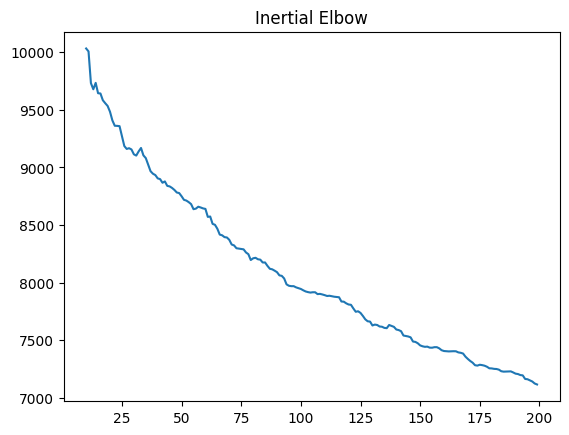

In [274]:
plt.plot(range(10,200), inertias)
plt.title('Inertial Elbow')
plt.show()

In [276]:
morgan_df['Jac_Kmeans'] = KMediansModel(k = 75).fit_predict(X)

In [ ]:
plt.plot(range(1,300), inertias)
plt.title('Inertial Elbow')
plt.show()

## Spectral Clusters

In [1]:
import pandas as pd

print_df = pd.read_csv('../data/raw/TSCA_fingerprints.csv').rename(columns = {'Unnamed:0':'dtxsid'})

In [2]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances

### Preprocessing to identify cluster number

These blocks attempt to identify an ideal cluster number by examining the eigenvalues for a gap - the standard method for optimizing Spectral Cluster numbers. However, we will see that this gap does not occur clearly within the first 1,000 eigenvalues, so we instead work with 175 clusters (close to one of the largest eigenvalue drops that we do see within the first 1000).

In [3]:
#Compute the similarities based on Morgan fingerprints
import numpy as np

morgan_prints = print_df.iloc[:,731:2779].dropna().astype('bool')


distance_matrix = pairwise_distances(np.array(morgan_prints), metric = 'jaccard')

sim_matrix = np.array([[1 for _ in range(distance_matrix.shape[0])] for _ in range(distance_matrix.shape[0])])-distance_matrix


#This is computationally intensive, requiring multiple 14176x14176 matrices, so we will manually clear out pieces of data that
#are clogging up the memory
import gc

pd.DataFrame(sim_matrix).to_csv('backup_sim_matrix.csv')

del distance_matrix
gc.collect()

0

In [4]:
#We can avoid crashing by reducing our matrices into smaller pieces for computations
submatrix1 = -sim_matrix[:7088, :7088]
submatrix3 = -sim_matrix[7088:, :7088]
submatrix2 = -sim_matrix[:7088, 7088:]
submatrix4 = -sim_matrix[7088:, 7088:]


In [5]:
from scipy.sparse import csr_matrix

#Compute the degree matrix and the block matrices of the Laplacian
degrees = np.sum(sim_matrix, axis=1)

for i in range(7088):
    submatrix1[i,i] = degrees[i] + submatrix1[i,i]
    submatrix4[i,i] = degrees[i+7088] + submatrix4[i,i]



In [7]:
#Temporarily save all these matrices so that we can delete unecessary variables and clear up memory
pd.DataFrame(submatrix1).to_csv('../outputs/submatrix1.csv')
pd.DataFrame(submatrix2).to_csv('../outputs/submatrix2.csv')
pd.DataFrame(submatrix3).to_csv('../outputs/submatrix3.csv')
pd.DataFrame(submatrix4).to_csv('../outputs/submatrix4.csv')

In [ ]:
#Cleaning memory again
import gc

del submatrix1, submatrix2, submatrix3, submatrix4, sim_matrix, degrees
gc.collect()

May require a kernel restart before the next two blocks if manual garbage collection was not enough. 

In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix

#Read back in and downcast the submatrices of the Laplacian

submatrix1 = csr_matrix(pd.read_csv('../outputs/submatrix1.csv', index_col = 0)).astype(np.float32)
submatrix2 = csr_matrix(pd.read_csv('../outputs/submatrix2.csv', index_col = 0)).astype(np.float32)
submatrix3 = csr_matrix(pd.read_csv('../outputs/submatrix3.csv', index_col = 0)).astype(np.float32)
submatrix4 = csr_matrix(pd.read_csv('../outputs/submatrix4.csv', index_col = 0)).astype(np.float32)

In [2]:
from scipy.sparse.linalg import eigsh
from scipy.sparse import block_array

#Construct the Laplacian and calculate the eigenvalues
laplacian_matrix = block_array([[submatrix1, submatrix3], [submatrix2, submatrix4]])

eigenvalues, eigenvectors = eigsh(laplacian_matrix, k = 5000, which = 'LM')

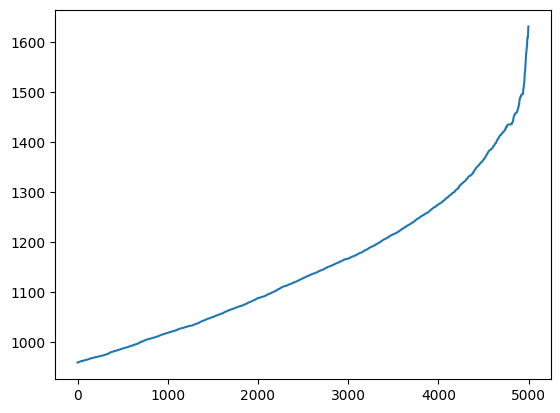

In [3]:
import matplotlib.pyplot as plt


#Plot the 1000 largest eigenvalues
plt.plot(eigenvalues)
plt.show()

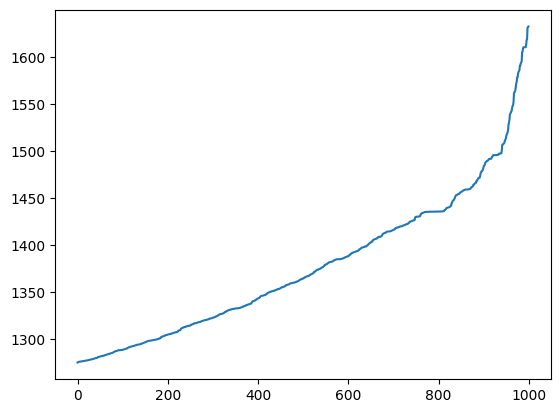

In [10]:
import matplotlib.pyplot as plt


#Plot the 1000 largest eigenvalues
plt.plot(eigenvalues)
plt.show()

### Cluster Computation

In [3]:
morgan_df = pd.read_csv("../outputs/morgan_clusters.csv")

In [6]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse.csgraph import connected_components

#Calculate connected components in the nearest_neighbors = 8 graph to confirm that the data is ready for Spectral Clustering

estimator = NearestNeighbors(n_neighbors=8, metric = 'jaccard')

graph = estimator.fit(print_df.iloc[:,731:2779].dropna().astype('bool')).kneighbors_graph(print_df.iloc[:,731:2779].dropna().astype('bool'), mode = 'distance')

connected_components(graph, directed=False)

(1, array([0, 0, 0, ..., 0, 0, 0]))

In [35]:
from sklearn.cluster import SpectralClustering

#Calculate the clusters
spec_model = SpectralClustering(n_clusters = 175, eigen_solver='arpack', affinity = 'precomputed_nearest_neighbors', n_neighbors=8)

spec_clusters = spec_model.fit_predict(graph)

In [36]:
#Save to the product DataFrame
morgan_df['spec_clusters'] = spec_clusters

In [12]:
from sklearn.cluster import SpectralClustering

#Calculate the clusters
spec_model = SpectralClustering(n_clusters = 75, eigen_solver='arpack', affinity = 'precomputed_nearest_neighbors', n_neighbors=8)

spec_clusters = spec_model.fit_predict(graph)

In [23]:
#Save to the product DataFrame
morgan_df['75_spec_clusters'] = spec_clusters

In [66]:
from sklearn.cluster import SpectralClustering

#Calculate the clusters
spec_model = SpectralClustering(n_clusters = 500, eigen_solver='arpack', affinity = 'precomputed_nearest_neighbors', n_neighbors=8)

spec_clusters = spec_model.fit_predict(graph)

In [67]:
#Save to the product DataFrame
morgan_df['500_spec_clusters'] = spec_clusters

In [ ]:
morgan_df.to_csv('../outputs/morgan_clusters.csv')

del morgan_df

# TSNE

This first model is the TSNE made using the Euclidean metric on Morgan fingerprints- we would expect it to look best with the KMeans clusters, which were calculated the same way. This raises the question of whether we could build a TSNE model based on something like ToxCast similarity, then look at how our various clusters sit in that toxicological space. 

In [88]:
import pandas as pd

morgan_df = pd.read_csv("../outputs/morgan_clusters.csv", index_col = 0)


### Euclidean TSNE

In [89]:
from sklearn.manifold import TSNE

#Compute the Euclidean TSNE
model = TSNE(n_components=2, perplexity=8, random_state=21)

tsne_features = model.fit_transform(morgan_df.iloc[:,:-2])

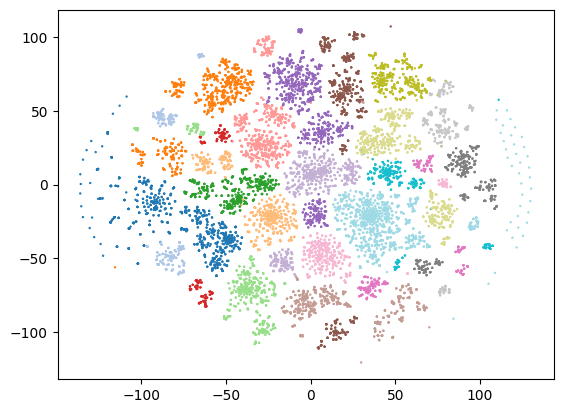

In [90]:
import matplotlib.pyplot as plt

#Plot the KMeans clusters on the TSNE plot
plt.scatter(tsne_features[:,0], tsne_features[:,1], s = 0.5, c = morgan_df['KMeans'], cmap = 'tab20', label = morgan_df['KMeans'])
plt.show()

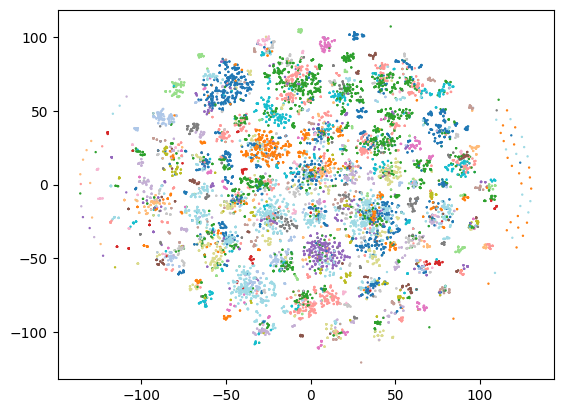

In [91]:
import matplotlib.pyplot as plt

#View the Spectral Clusters on the TSNE plot
plt.scatter(tsne_features[:,0], tsne_features[:,1], s = 0.5, c = morgan_df['spec_clusters'], cmap = 'tab20', label = morgan_df['spec_clusters'])
plt.show()

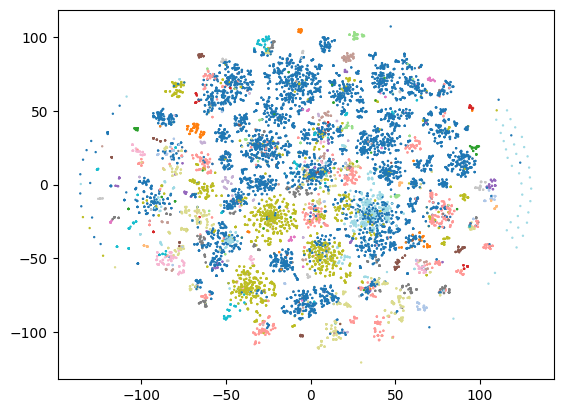

In [92]:
import matplotlib.pyplot as plt

#View the Spectral Clusters on the TSNE plot
plt.scatter(tsne_features[:,0], tsne_features[:,1], s = 0.5, c = morgan_df['75_spec_clusters'], cmap = 'tab20', label = morgan_df['spec_clusters'])
plt.show()

In [93]:
#Save the tsne features to the data frame and combine to obtain additional group information
morgan_df['euclidean_tsne_x'] = tsne_features[:,0]
morgan_df['euclidean_tsne_y'] = tsne_features[:,1]

group_df = all_groups.merge(morgan_df.reset_index().rename(columns = {"Unnamed: 0":'dtxsid'}), how = 'right', on = 'dtxsid')

group_df = group_df[['dtxsid', 'smiles', 'ClassyFire', 'predicted group 1', 'in domain', 'epa_list', 'group', 'spec_clusters', 'KMeans', 'euclidean_tsne_x', 'euclidean_tsne_y']]

#Set up numerical groups for the clusters for plt interpretation
i = 0 
name_dict = {}
for group_name in group_df['group'].unique():
    name_dict[group_name] = i
    i += 1

group_df['group_index'] = [name_dict[k] for k in group_df['group']]

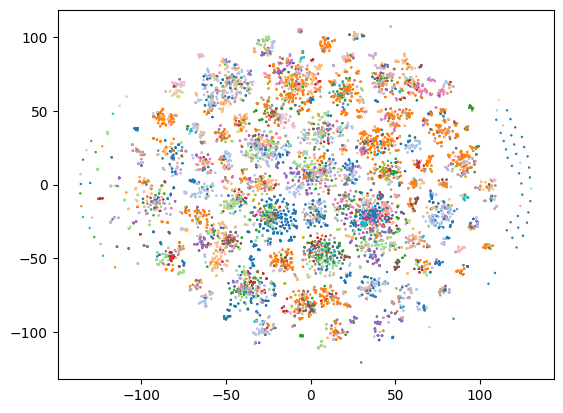

In [94]:
#Plot the Grace clusters on the TSNE plot
import seaborn as sns
plt.scatter(x= tsne_features[:,0], s = 0.5, y = tsne_features[:,1], c = group_df['group_index'], cmap = 'tab20')
plt.show()

In [95]:
# Set up numerical ClassyFire groups for interpretation by plt
i = 0 
name_dict = {}
for group_name in group_df['ClassyFire'].unique():
    name_dict[group_name] = i
    i += 1

group_df['ClassyFire_index'] = [name_dict[k] for k in group_df['ClassyFire']]

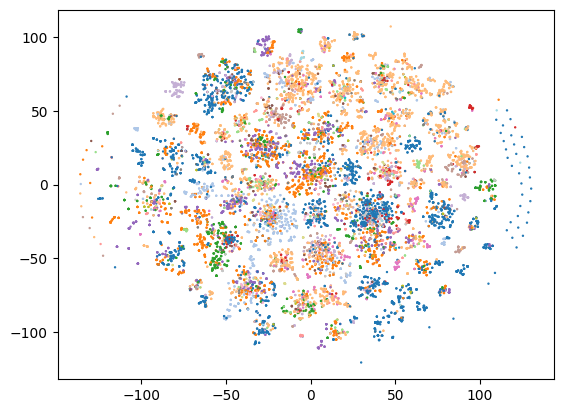

In [96]:
#Plot the ClassyFire clusters on the TSNE plot
plt.scatter(x= tsne_features[:,0], s = 0.5, y = tsne_features[:,1], c = group_df['ClassyFire_index'], cmap = 'tab20')
plt.show()

#### View individual clusters on the TSNE

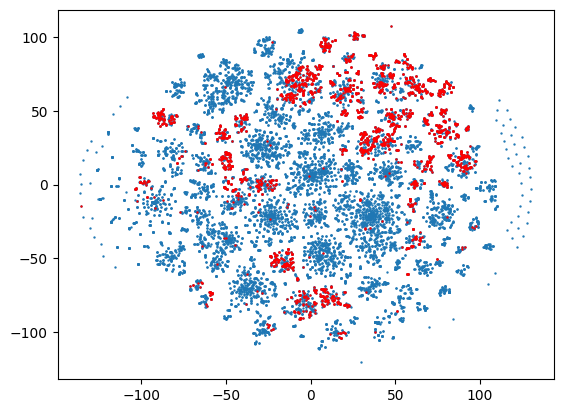

In [102]:
#Adjust cluster_column and category_name as needed, non-NCC only

cluster_column = 'ClassyFire'
category_name = 'Benzene and substituted derivatives'

plt.scatter(x= tsne_features[:,0], s = 0.5, y = tsne_features[:,1])

sub_df = group_df.loc[group_df[cluster_column]==category_name]
plt.scatter(x= sub_df['euclidean_tsne_x'], s = 0.5, y = sub_df['euclidean_tsne_y'], c = 'red')

plt.show()

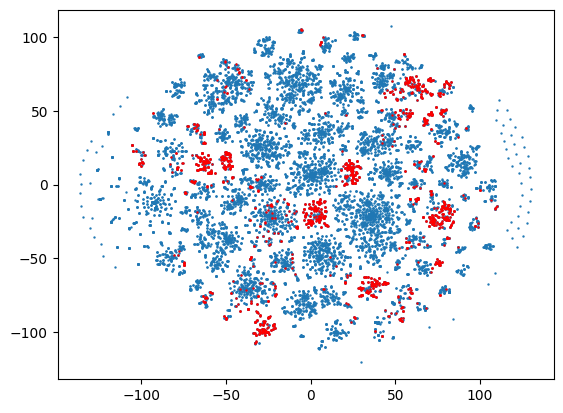

In [126]:
#Adjust category_name as needed for NCC categories

category_name = 'Esters (Acute toxicity)'

plt.scatter(x= tsne_features[:,0], s = 0.5, y = tsne_features[:,1])

smaller_group_df = group_df.dropna()
indexer = []
for listing in smaller_group_df['epa_list']:
    if category_name in listing:
        indexer.append(True)
    else:
        indexer.append(False)
sub_df = smaller_group_df.loc[indexer]

plt.scatter(x= sub_df['euclidean_tsne_x'], s = 0.5, y = sub_df['euclidean_tsne_y'], c = 'red')

plt.show()

## Jaccard TSNE

The following TSNE model uses the Jaccard metric on the Morgan fingerprints. We would expect the Spectral Clusters to look best on this plot, as they were also constructed this way. 

### Initial: Perplexity = 30

In [ ]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, perplexity=30, metric='jaccard', random_state=42)

#Swap to boolean values for the Jaccard metric
morgan_df_for_tsne = morgan_df.iloc[:,:-2].astype('bool')

tsne_features = model.fit_transform(morgan_df_for_tsne)

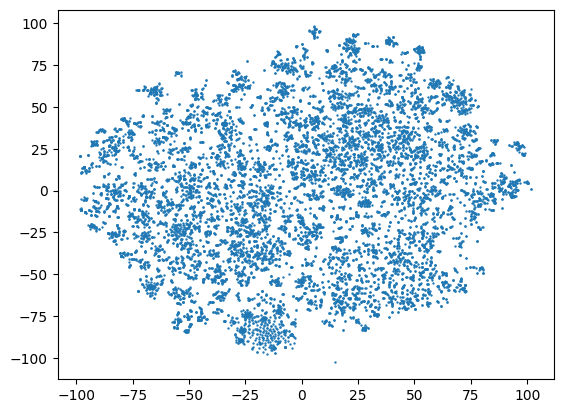

In [49]:
import matplotlib.pyplot as plt

plt.scatter(tsne_features[:,0], tsne_features[:,1], s = 0.5, label = morgan_df['spec_clusters'])
plt.show()

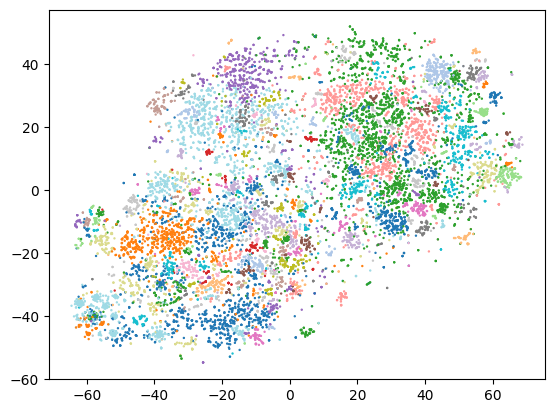

In [64]:
import matplotlib.pyplot as plt

plt.scatter(tsne_features[:,0], tsne_features[:,1], s = 0.5, c = morgan_df['spec_clusters'], cmap = 'tab20', label = morgan_df['spec_clusters'])
plt.show()

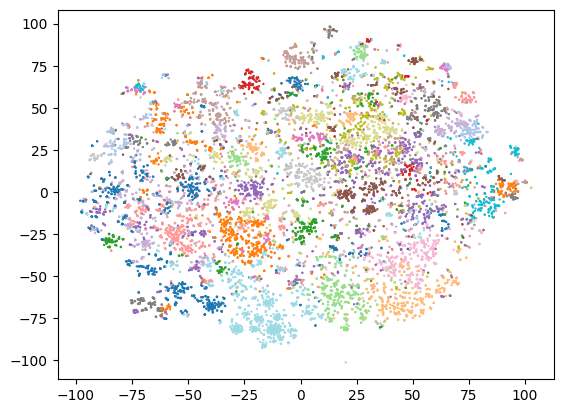

In [72]:
import matplotlib.pyplot as plt

plt.scatter(tsne_features[:,0], tsne_features[:,1], s = 0.5, c = morgan_df['KMeans'], cmap = 'tab20', label = morgan_df['KMeans'])
plt.show()

### Perplexity = 25

c:\Users\aleary\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
c:\Users\aleary\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


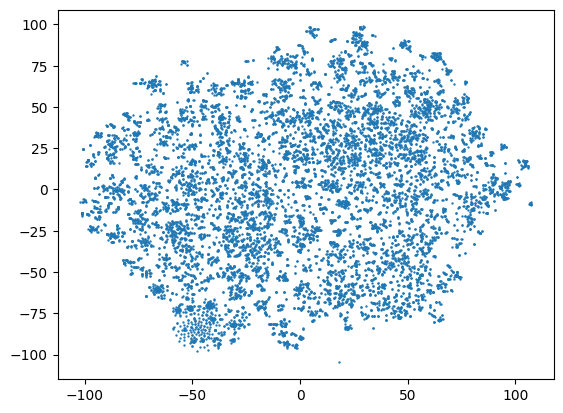

In [61]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, perplexity=25, metric='jaccard', random_state=21)

#Swap to boolean values for the Jaccard metric
morgan_df_for_tsne = morgan_df.iloc[:,:-2].astype('bool')

tsne_25_features = model.fit_transform(morgan_df_for_tsne)

import matplotlib.pyplot as plt

plt.scatter(tsne_25_features[:,0], tsne_25_features[:,1], s = 0.5, label = morgan_df['spec_clusters'])
plt.show()

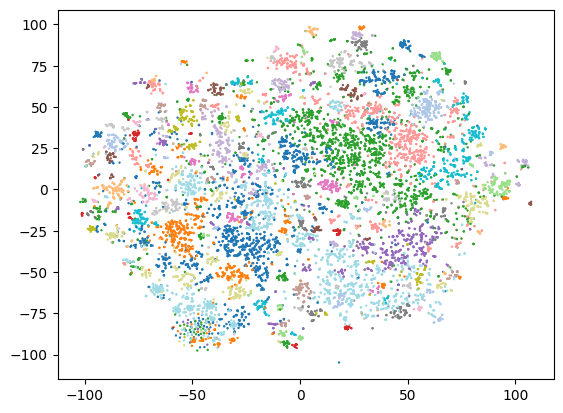

In [71]:
#Plot the KMeans clusters on the TSNE plot

plt.scatter(x= tsne_25_features[:,0], s = 0.5, y = tsne_25_features[:,1], c = morgan_df['spec_clusters'], cmap='tab20')
plt.show()

In [294]:
#Save the tsne features to the data frame and combine to obtain additional group information
morgan_df['jaccard_25_tsne_x'] = tsne_25_features[:,0]
morgan_df['jaccard_25_tsne_y'] = tsne_25_features[:,1]

group_df = all_groups.merge(morgan_df.reset_index().rename(columns = {"Unnamed: 0":'dtxsid'}), how = 'right', on = 'dtxsid')

group_df = group_df[['dtxsid', 'smiles', 'ClassyFire', 'predicted group 1', 'in domain', 'epa_list', 'group', 'spec_clusters', 'KMeans', 'Jac_Kmeans','euclidean_tsne_x', 'euclidean_tsne_y', 'jaccard_25_tsne_x', 'jaccard_25_tsne_y']]

#Set up numerical groups for the clusters for plt interpretation
i = 0 
name_dict = {}
for group_name in group_df['group'].unique():
    name_dict[group_name] = i
    i += 1

group_df['group_index'] = [name_dict[k] for k in group_df['group']]

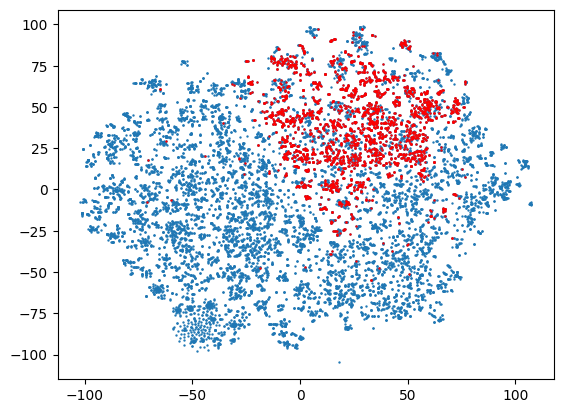

In [295]:
#Adjust cluster_column and category_name as needed, non-NCC only

cluster_column = 'ClassyFire'
category_name = 'Benzene and substituted derivatives'

plt.scatter(x= tsne_25_features[:,0], s = 0.5, y = tsne_25_features[:,1])

sub_df = group_df.loc[group_df[cluster_column]==category_name]
plt.scatter(x= sub_df['jaccard_25_tsne_x'], s = 0.5, y = sub_df['jaccard_25_tsne_y'], c = 'red')

plt.show()

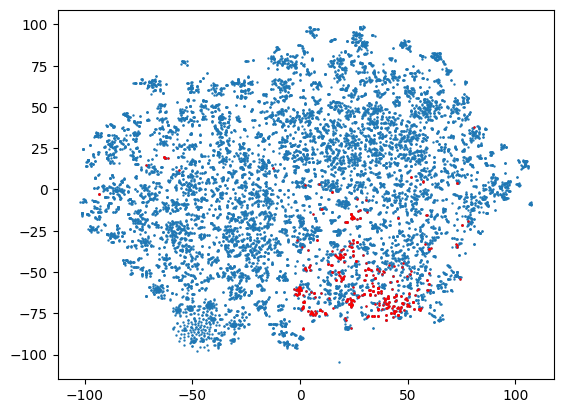

In [305]:
#Adjust cluster_column and category_name as needed, non-NCC only

cluster_column = 'predicted group 1'
category_name = 'Cyclic ethers'

plt.scatter(x= tsne_25_features[:,0], s = 0.5, y = tsne_25_features[:,1])

sub_df = group_df.loc[group_df[cluster_column]==category_name]
plt.scatter(x= sub_df['jaccard_25_tsne_x'], s = 0.5, y = sub_df['jaccard_25_tsne_y'], c = 'red')

plt.show()

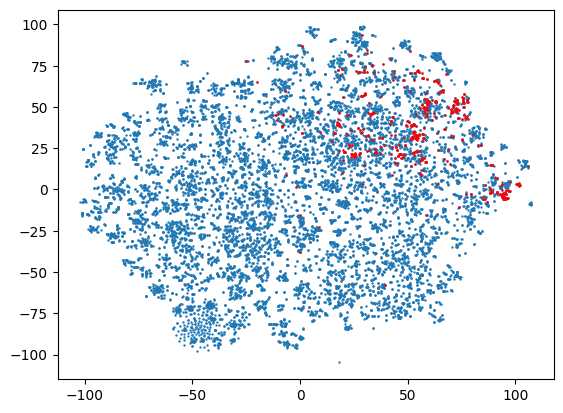

In [303]:
#Adjust category_name as needed for NCC categories

category_name = 'Anilines (Acute toxicity)'

plt.scatter(x= tsne_25_features[:,0], s = 0.5, y = tsne_25_features[:,1])

smaller_group_df = group_df.dropna()
indexer = []
for listing in smaller_group_df['epa_list']:
    if category_name in listing:
        indexer.append(True)
    else:
        indexer.append(False)
sub_df = smaller_group_df.loc[indexer]

plt.scatter(x= sub_df['jaccard_25_tsne_x'], s = 0.5, y = sub_df['jaccard_25_tsne_y'], c = 'red')

plt.show()

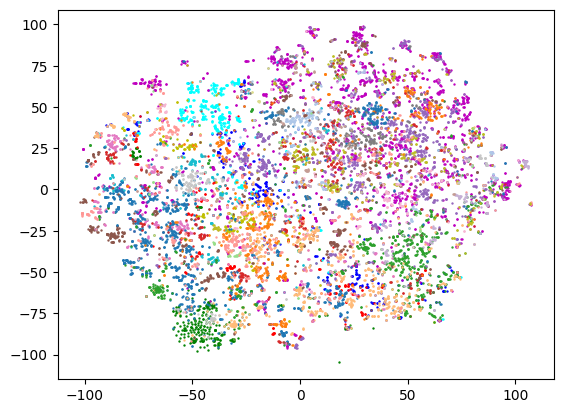

In [316]:
#Plot the ARN groups on the TSNE plot
import matplotlib.colors as mcolors

group_dict = {}
i = 0
for group_name in group_df['predicted group 1'].unique():
    group_dict[group_name] = i
    i += 1

base_colors = ['b', 'g', 'r', 'cyan', 'm', 'y']
tableau_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
tab20 = plt.colormaps.get_cmap('tab20').colors

# Ensure enough colors are selected from tab20
num_remaining_colors = 60 - len(base_colors) - len(tableau_colors)
tab20_indices = np.linspace(0, 19, num_remaining_colors, dtype=int)
tab20_selected = [mcolors.to_hex(tab20[i]) for i in tab20_indices]

# Combine all color lists
all_colors = base_colors + tableau_colors + tab20_selected

group_df['arn_group_no'] = [group_dict[group_name] for group_name in group_df['predicted group 1']]

for group in group_df['predicted group 1'].unique():
    sub_df = group_df.loc[group_df['predicted group 1'] == group]
    plt.scatter(x= sub_df['jaccard_25_tsne_x'], s = 0.5, y = sub_df['jaccard_25_tsne_y'], c = all_colors[group_dict[group]], label = group)
# plt.legend()
plt.show()

### Perplexity = 100

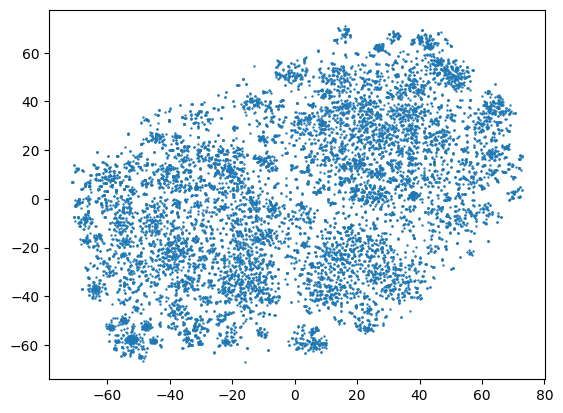

In [ ]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, perplexity=100, metric='jaccard', random_state=42)

#Swap to boolean values for the Jaccard metric
morgan_df_for_tsne = morgan_df.iloc[:,:-2].astype('bool')

tsne_100_features = model.fit_transform(morgan_df_for_tsne)

import matplotlib.pyplot as plt

plt.scatter(tsne_100_features[:,0], tsne_100_features[:,1], s = 0.5, label = morgan_df['spec_clusters'])
plt.show()

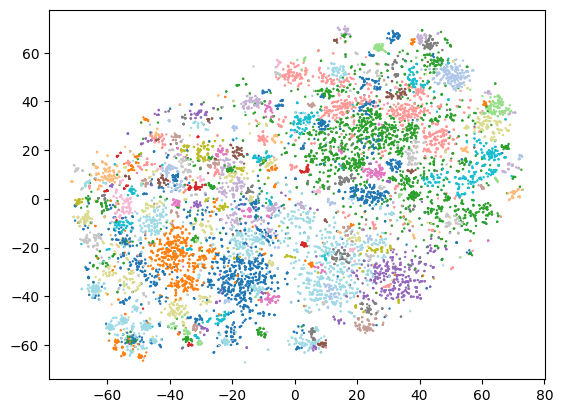

In [ ]:
#Plot the Spectral clusters on the TSNE plot

plt.scatter(x= tsne_100_features[:,0], s = 0.5, y = tsne_100_features[:,1], c = morgan_df['spec_clusters'], cmap='tab20')
plt.show()

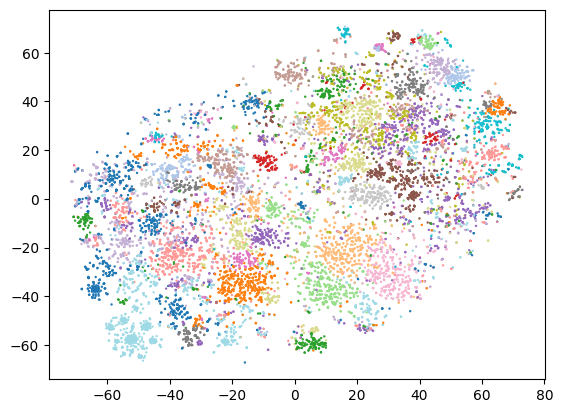

In [135]:
#Plot the KMeans clusters on the TSNE plot

plt.scatter(x= tsne_100_features[:,0], s = 0.5, y = tsne_100_features[:,1], c = morgan_df['KMeans'], cmap='tab20')
plt.show()

In [137]:
# Apply Kmeans directly to the TSNE and view the results

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

#Compute the clusters using the parameters selected above
X = tsne_100_features

labels = KMeans(n_clusters=75, random_state=93).fit_predict(X)

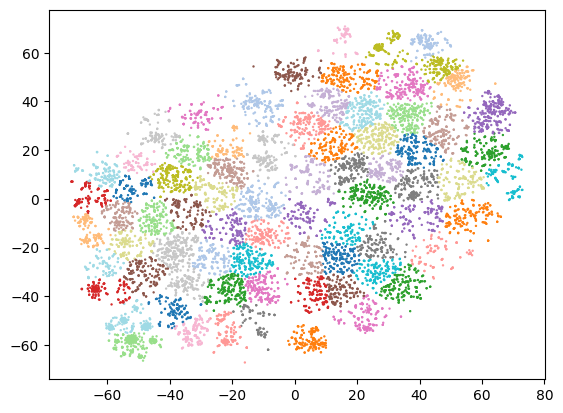

In [138]:
#Plot the KMeans clusters on the TSNE plot

plt.scatter(x= tsne_100_features[:,0], s = 0.5, y = tsne_100_features[:,1], c = labels, cmap='tab20')
plt.show()

In [283]:
#Save the tsne features to the data frame and combine to obtain additional group information
morgan_df['jaccard_100_tsne_x'] = tsne_100_features[:,0]
morgan_df['jaccard_100_tsne_y'] = tsne_100_features[:,1]

group_df = all_groups.merge(morgan_df.reset_index().rename(columns = {"Unnamed: 0":'dtxsid'}), how = 'right', on = 'dtxsid')

group_df = group_df[['dtxsid', 'smiles', 'ClassyFire', 'predicted group 1', 'in domain', 'epa_list', 'group', 'spec_clusters', 'KMeans', 'Jac_Kmeans','euclidean_tsne_x', 'euclidean_tsne_y', 'jaccard_100_tsne_x', 'jaccard_100_tsne_y']]

#Set up numerical groups for the clusters for plt interpretation
i = 0 
name_dict = {}
for group_name in group_df['group'].unique():
    name_dict[group_name] = i
    i += 1

group_df['group_index'] = [name_dict[k] for k in group_df['group']]

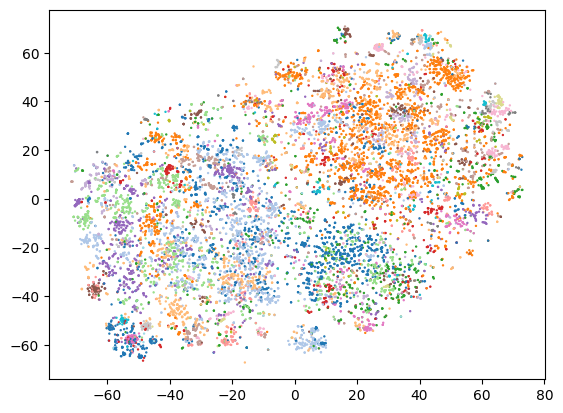

In [130]:
#Plot the Grace clusters on the TSNE plot
import seaborn as sns
plt.scatter(x= tsne_100_features[:,0], s = 0.5, y = tsne_100_features[:,1], c = group_df['group_index'], cmap = 'tab20')
plt.show()

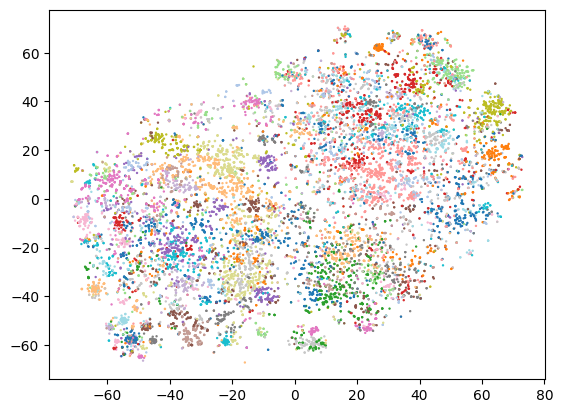

In [286]:
#Plot the Grace clusters on the TSNE plot
import seaborn as sns
plt.scatter(x= group_df['jaccard_100_tsne_x'], s = 0.5, y = group_df['jaccard_100_tsne_y'], c = group_df['Jac_Kmeans'], cmap = 'tab20')
plt.show()

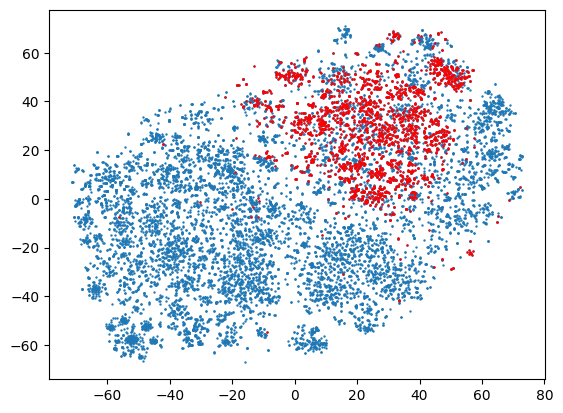

In [133]:
#Adjust cluster_column and category_name as needed, non-NCC only

cluster_column = 'ClassyFire'
category_name = 'Benzene and substituted derivatives'

plt.scatter(x= tsne_100_features[:,0], s = 0.5, y = tsne_100_features[:,1])

sub_df = group_df.loc[group_df[cluster_column]==category_name]
plt.scatter(x= sub_df['jaccard_100_tsne_x'], s = 0.5, y = sub_df['jaccard_100_tsne_y'], c = 'red')

plt.show()

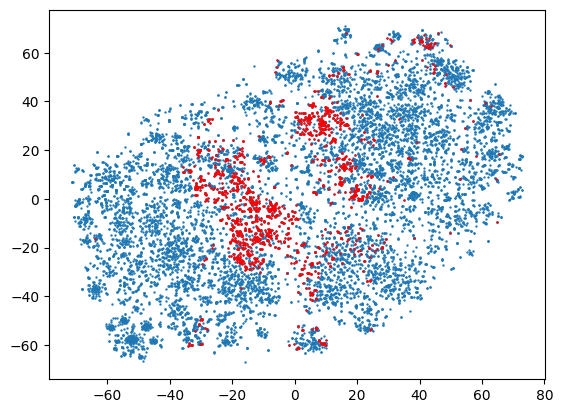

In [134]:
#Adjust category_name as needed for NCC categories

category_name = 'Esters (Acute toxicity)'

plt.scatter(x= tsne_100_features[:,0], s = 0.5, y = tsne_100_features[:,1])

smaller_group_df = group_df.dropna()
indexer = []
for listing in smaller_group_df['epa_list']:
    if category_name in listing:
        indexer.append(True)
    else:
        indexer.append(False)
sub_df = smaller_group_df.loc[indexer]

plt.scatter(x= sub_df['jaccard_100_tsne_x'], s = 0.5, y = sub_df['jaccard_100_tsne_y'], c = 'red')

plt.show()

### Perplexity = 200

In [ ]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, perplexity=200, metric='jaccard', random_state=42)

#Swap to boolean values for the Jaccard metric
morgan_df_for_tsne = morgan_df.iloc[:,:-2].astype('bool')

tsne_200_features = model.fit_transform(morgan_df_for_tsne)

import matplotlib.pyplot as plt

plt.scatter(tsne_200_features[:,0], tsne_200_features[:,1], s = 0.5, label = morgan_df['spec_clusters'])
plt.show()